In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
odi_bat = pd.read_csv("/content/ODI data.csv")
odi_bow = pd.read_csv("/content/Bowling_ODI.csv")
odi_field = pd.read_csv("/content/Fielding_ODI.csv")

t20_bat = pd.read_csv("/content/t20.csv")
t20_bow = pd.read_csv("/content/Bowling_t20.csv")
t20_field = pd.read_csv("/content/Fielding_t20.csv")

test_bat = pd.read_csv("/content/test.csv")
test_bow = pd.read_csv("/content/Bowling_test.csv")
test_field = pd.read_csv("/content/Fielding_test.csv")

In [ ]:
odi_bat = odi_bat.drop(odi_bat.columns[[0,-1]],axis=1)
odi_bow = odi_bow.drop(odi_bow.columns[[0,-1]],axis=1)
odi_field = odi_field.drop(odi_field.columns[[0,-1]],axis=1)

t20_bat = t20_bat.drop(t20_bat.columns[[0,-1]],axis=1)
t20_bow = t20_bow.drop(t20_bow.columns[[0,-1]],axis=1)
t20_field = t20_field.drop(t20_field.columns[[0,-1]],axis=1)

test_bat = test_bat.drop(test_bat.columns[[0,-1]],axis=1)
test_bow = test_bow.drop(test_bow.columns[[0,-1]],axis=1)
test_field = test_field.drop(test_field.columns[[0,-1]],axis=1)

## **Odi data cleaning**

In [ ]:
odi_bat.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [ ]:
odi_bat = odi_bat.drop(odi_bat.index[-10:])

In [ ]:
odi_bat['Ave'].replace('-',np.nan,inplace=True)
odi_bat['Ave'].isnull().sum()

120

In [ ]:
odi_bat['Ave'].fillna(0,inplace=True)
odi_bat['Ave'].isnull().sum()

0

In [ ]:
odi_bat['Ave'] = pd.to_numeric(odi_bat['Ave'], errors='coerce')

In [ ]:
odi_bat['SR'].replace('-',np.nan,inplace=True)
odi_bat['SR'].fillna(0,inplace=True)

In [ ]:
odi_bat['HS'] = odi_bat['HS'].str.replace('*','')
odi_bat['HS'] = odi_bat['HS'].astype(int)

In [ ]:
odi_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2490 non-null   object 
 1   Span    2490 non-null   object 
 2   Mat     2490 non-null   int64  
 3   Inns    2490 non-null   object 
 4   NO      2490 non-null   object 
 5   Runs    2490 non-null   object 
 6   HS      2490 non-null   int64  
 7   Ave     2490 non-null   float64
 8   BF      2490 non-null   object 
 9   SR      2490 non-null   object 
 10  100     2490 non-null   object 
 11  50      2490 non-null   object 
 12  0       2490 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 253.0+ KB


In [ ]:
odi_bat.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20


In [ ]:
odi_bat['Mat'] = odi_bat['Mat'].astype(int)
odi_bat['Inns'] = odi_bat['Inns'].astype(int)
odi_bat['NO'] = odi_bat['NO'].astype(int)
odi_bat['Runs'] = odi_bat['Runs'].astype(int)
odi_bat['HS'] = odi_bat['HS'].astype(int)
odi_bat['BF'] = odi_bat['BF'].astype(int)
odi_bat['100'] = odi_bat['100'].astype(int)
odi_bat['50'] = odi_bat['50'].astype(int)
odi_bat['0'] = odi_bat['0'].astype(int)
odi_bat['Ave'] = odi_bat['Ave'].astype(float)
odi_bat['SR'] = odi_bat['SR'].astype(float)

odi bowling cleaning

In [ ]:
odi_bow.head()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M Muralitharan (Asia/ICC/SL),1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10
1,Wasim Akram (PAK),1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6
2,Waqar Younis (PAK),1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13
3,WPUJC Vaas (Asia/SL),1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4
4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9


In [ ]:
odi_bow.tail()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
2577,TJ Zoehrer (AUS),1986-1994,22,-,-,-,-,-,-,-,-,-,-
2578,K Zondo (SA),2018-2018,5,-,-,-,-,-,-,-,-,-,-
2579,B Zuiderent (NL),1996-2011,57,-,-,-,-,-,-,-,-,-,-
2580,Zulqarnain (PAK),1985-1989,16,-,-,-,-,-,-,-,-,-,-
2581,Zulqarnain Haider (PAK),2010-2010,4,-,-,-,-,-,-,-,-,-,-


In [ ]:
odi_bow.drop(odi_bow.index[-709:],inplace=True)

In [ ]:
odi_bow['Ave'].replace('-',np.nan,inplace=True)
odi_bow['Ave'].isnull().sum()

277

In [ ]:
odi_bow['Ave'].fillna(0,inplace=True)

In [ ]:
odi_bow['Ave'] = pd.to_numeric(odi_bow['Ave'], errors='coerce')

In [ ]:
odi_bow['SR'].replace('-',np.nan,inplace=True)
odi_bow['SR'].fillna(0,inplace=True)

In [ ]:
odi_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1873 non-null   object 
 1   Span    1873 non-null   object 
 2   Mat     1873 non-null   int64  
 3   Inns    1873 non-null   object 
 4   Balls   1873 non-null   object 
 5   Runs    1873 non-null   object 
 6   Wkts    1873 non-null   object 
 7   BBI     1873 non-null   object 
 8   Ave     1873 non-null   float64
 9   Econ    1873 non-null   object 
 10  SR      1873 non-null   object 
 11  4       1873 non-null   object 
 12  5       1873 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 190.4+ KB


In [ ]:
odi_bow.head(1)

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M Muralitharan (Asia/ICC/SL),1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10


In [ ]:
odi_bow['Mat'] = odi_bow['Mat'].astype(int)
odi_bow['Inns'] = odi_bow['Inns'].astype(int)
odi_bow['Balls'] = odi_bow['Balls'].astype(int)
odi_bow['Runs'] = odi_bow['Runs'].astype(int)
odi_bow['Wkts'] = odi_bow['Wkts'].astype(int)
odi_bow['4'] = odi_bow['4'].astype(int)
odi_bow['5'] = odi_bow['5'].astype(int)
odi_bat['Ave'] = odi_bat['Ave'].astype(float)

Odi fielding cleaning

In [ ]:
odi_field.head()

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,KC Sangakkara (Asia/ICC/SL),2000-2015,404,397,501,402,99,383,19,5 (4ct 1st),1.261
1,AC Gilchrist (AUS/ICC),1996-2008,287,286,472,417,55,417,0,6 (6ct 0st),1.650
2,MS Dhoni (Asia/INDIA),2004-2019,350,345,444,321,123,321,0,6 (5ct 1st),1.286
3,MV Boucher (Afr/SA),1998-2011,295,291,425,403,22,402,1,6 (6ct 0st),1.460
4,Moin Khan (PAK),1990-2004,219,217,287,214,73,214,0,5 (5ct 0st),1.322


In [ ]:
odi_field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2600 non-null   object 
 1   Span    2600 non-null   object 
 2   Mat     2600 non-null   int64  
 3   Inns    2600 non-null   int64  
 4   Dis     2600 non-null   int64  
 5   Ct      2600 non-null   int64  
 6   St      2600 non-null   int64  
 7   Ct Wk   2600 non-null   int64  
 8   Ct Fi   2600 non-null   int64  
 9   MD      2600 non-null   object 
 10  D/I     2600 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 223.6+ KB


In [ ]:
odi_field.head(1)

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,KC Sangakkara (Asia/ICC/SL),2000-2015,404,397,501,402,99,383,19,5 (4ct 1st),1.261


In [ ]:
odi_field['Mat']=odi_field['Mat'].astype(int)
odi_field['Inns']=odi_field['Inns'].astype(int)
odi_field['Dis']=odi_field['Dis'].astype(int)
odi_field['Ct']=odi_field['Ct'].astype(int)
odi_field['St']=odi_field['St'].astype(int)
odi_field['Ct Wk']=odi_field['Ct Wk'].astype(int)
odi_field['Ct Fi']=odi_field['Ct Fi'].astype(int)
odi_field['D/I']=odi_field['D/I'].astype(float)

**Merge bat, bow & field dataset**

In [ ]:
data = pd.merge(odi_bat,odi_bow,how='inner',left_on=['Player','Span'],right_on=['Player','Span']).merge(odi_field,how='inner',on=['Player','Span'])
data.shape

(1352, 33)

In [ ]:
data.head()

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,5,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,2,463,456,140,140,0,0,140,4 (4ct 0st),0.307
1,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,2,463,456,140,140,0,0,140,4 (4ct 0st),0.307
2,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,2,463,456,140,140,0,0,140,4 (4ct 0st),0.307
3,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,2,463,456,140,140,0,0,140,4 (4ct 0st),0.307
4,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,2,463,456,140,140,0,0,140,4 (4ct 0st),0.307


In [ ]:
data = data.drop_duplicates()
data.shape

(26, 33)

In [ ]:
data.columns

Index(['Player', 'Span', 'Mat_x', 'Inns_x', 'NO', 'Runs_x', 'HS', 'Ave_x',
       'BF', 'SR_x', '100', '50', '0', 'Mat_y', 'Inns_y', 'Balls', 'Runs_y',
       'Wkts', 'BBI', 'Ave_y', 'Econ', 'SR_y', '4', '5', 'Mat', 'Inns', 'Dis',
       'Ct', 'St', 'Ct Wk', 'Ct Fi', 'MD', 'D/I'],
      dtype='object')

In [ ]:
data['country'] = data['Player'].apply(lambda x: x.split('(')[1].split(')')[0] if '(' in x and ')' in x else '')

<ipython-input-32-4d29fc60c7f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = data['Player'].apply(lambda x: x.split('(')[1].split(')')[0] if '(' in x and ')' in x else '')


In [ ]:
def val_col(country):
    countries = country.split('/')
    valid_countries = [country for country in countries if country not in ['ICC', 'Asia', 'Afr', 'EAf']]
    return valid_countries[-1] if valid_countries else np.nan

In [ ]:
data['country'] = data['country'].apply(val_col)
data.head()

<ipython-input-34-84d257af013f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = data['country'].apply(val_col)


,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,country
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,463,456,140,140,0,0,140,4 (4ct 0st),0.307,INDIA
52,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,...,375,372,160,160,0,0,160,3 (3ct 0st),0.430,AUS
104,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,...,445,441,123,123,0,0,123,3 (3ct 0st),0.278,SL
156,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,...,448,443,218,218,0,0,218,4 (4ct 0st),0.492,SL
208,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137,39.52,15812,74.24,...,378,373,113,113,0,0,113,3 (3ct 0st),0.302,PAK


In [ ]:
ind_player = data[data['country']=='INDIA']
grp_data = ind_player.groupby('Player').sum()
odi_ind_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
odi_ind_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
odi_ind_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'ODI India Best Batsman')

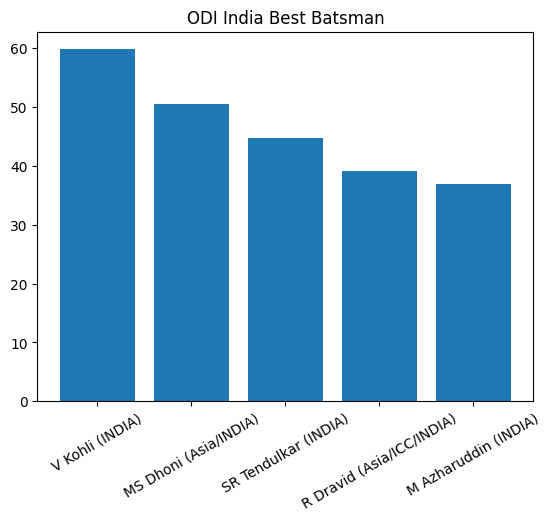

In [ ]:
plt.bar(odi_ind_bat.index,odi_ind_bat['Ave_x'])
plt.xticks(rotation = 30)
plt.title('ODI India Best Batsman')

Text(0.5, 1.0, 'ODI Indian Best Bowler')

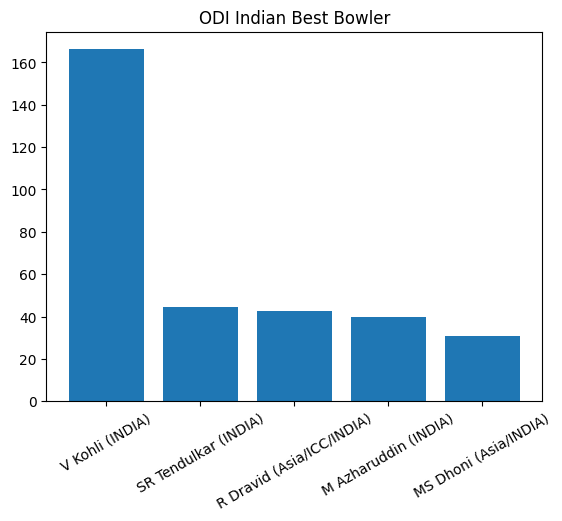

In [ ]:
plt.bar(odi_ind_bow.index,odi_ind_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('ODI Indian Best Bowler')

Text(0.5, 1.0, 'ODI Indian Best Fielder')

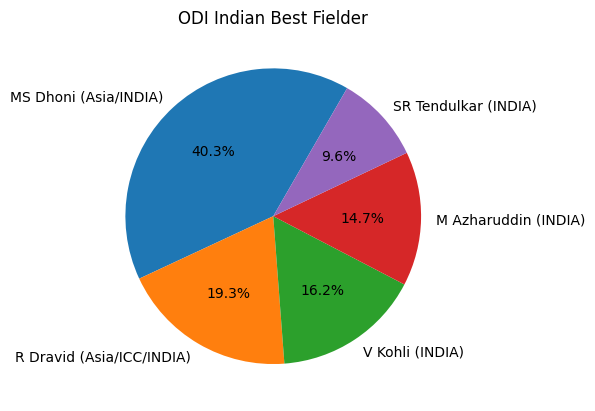

In [ ]:
plt.pie(odi_ind_field['D/I'],labels=odi_ind_field.index,autopct='%1.1f%%',startangle=60)
plt.title('ODI Indian Best Fielder')

In [ ]:
pak_player = data[data['country']=='PAK']
grp1_data = pak_player.groupby('Player').sum()
odi_pak_bat = grp1_data.sort_values(by='Ave_x',ascending=False).head()
odi_pak_bow = grp1_data.sort_values(by='Ave_y',ascending=False).head()
odi_pak_field = grp1_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'ODI Pak Best Batsman')

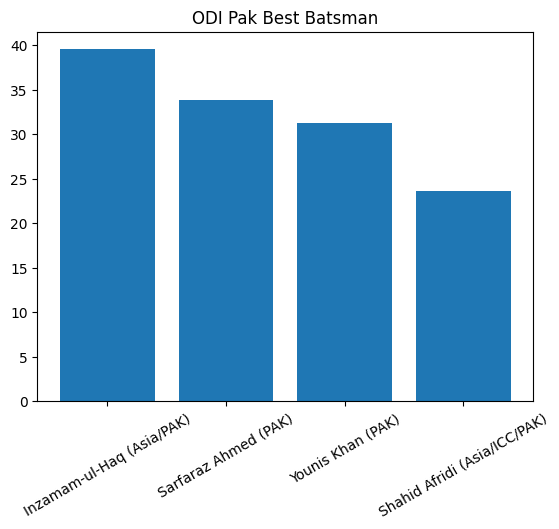

In [ ]:
plt.bar(odi_pak_bat.index,odi_pak_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('ODI Pak Best Batsman')

Text(0.5, 1.0, 'ODI Pak Best Bowler')

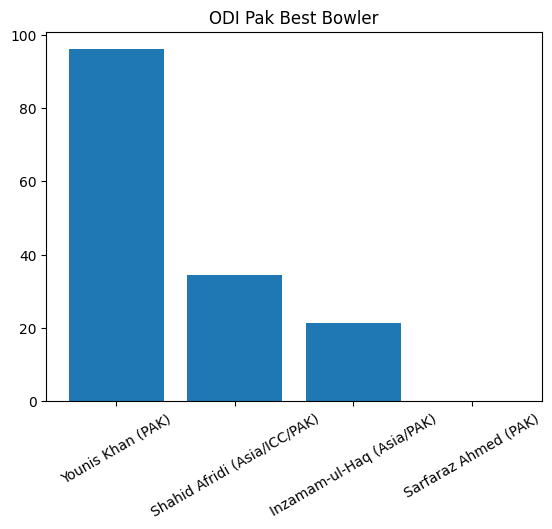

In [ ]:
plt.bar(odi_pak_bow.index,odi_pak_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('ODI Pak Best Bowler')

Text(0.5, 1.0, 'ODI Pak Best Fielder')

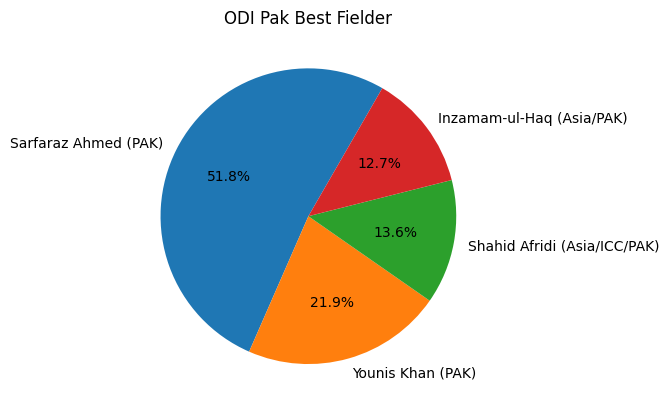

In [ ]:
plt.pie(odi_pak_field['D/I'],labels=odi_pak_field.index,autopct='%1.1f%%',startangle=60)
plt.title('ODI Pak Best Fielder')

In [ ]:
sl_player = data[data['country']=='SL']
grp1_data = sl_player.groupby('Player').sum()
odi_sl_bat = grp1_data.sort_values(by='Ave_x',ascending=False).head()
odi_sl_bow = grp1_data.sort_values(by='Ave_y',ascending=False).head()
odi_sl_field = grp1_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'ODI SL Best Batsman')

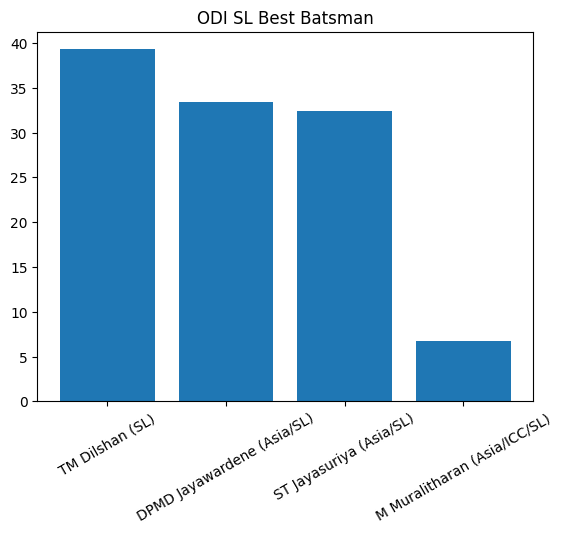

In [ ]:
plt.bar(odi_sl_bat.index,odi_sl_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('ODI SL Best Batsman')

Text(0.5, 1.0, 'ODI SL Best Bowler')

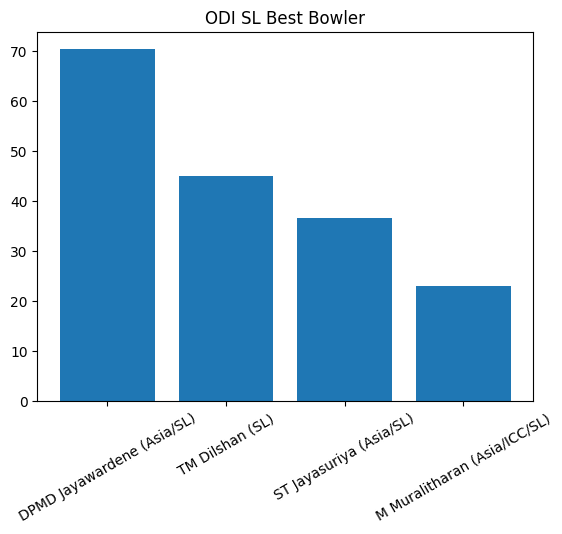

In [ ]:
plt.bar(odi_sl_bow.index,odi_sl_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('ODI SL Best Bowler')

Text(0.5, 1.0, 'ODI SL Best Fielder')

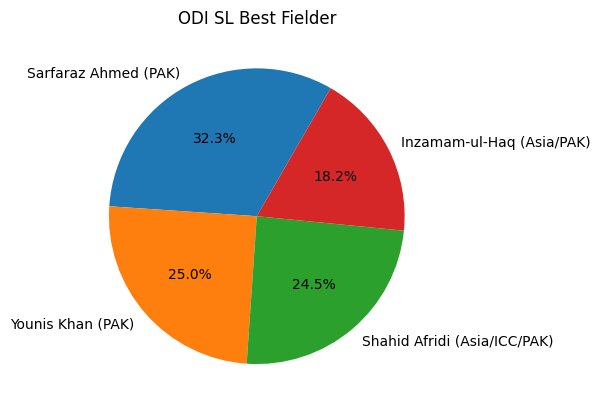

In [ ]:
plt.pie(odi_sl_field['D/I'],labels=odi_pak_field.index,autopct='%1.1f%%',startangle=60)
plt.title('ODI SL Best Fielder')

## **T20 data cleaning**

In [ ]:
t20_bat.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91


In [ ]:
t20_bat.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
2001,SG Whittingham (SCOT),2018-2018,3,-,-,-,-,-,-,-,-,-,-,-,-
2002,LJ Woodcock (NZ),2010-2011,3,-,-,-,-,-,-,-,-,-,-,-,-
2003,Zamir Khan (AFG),2012-2012,1,-,-,-,-,-,-,-,-,-,-,-,-
2004,S Zargar (Mex),2019-2019,1,-,-,-,-,-,-,-,-,-,-,-,-
2005,Ziaur Rahman (AFG),2019-2019,1,-,-,-,-,-,-,-,-,-,-,-,-


In [ ]:
t20_bat = t20_bat.drop(t20_bat.index[-152:])
t20_bat.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1849,H Ssenyondo (UGA),2019-2019,4,1,1,0,0*,-,0,-,0,0,0,0,0
1850,Taijul Islam (BDESH),2019-2019,2,1,1,0,0*,-,1,0.00,0,0,0,0,0
1851,Ziaur Rehman (Fin),2019-2019,1,1,0,0,0,0.00,4,0.00,0,0,1,0,0
1852,M Zondeki (SA),2006-2006,1,1,0,0,0,0.00,1,0.00,0,0,1,0,0
1853,Zulqarnain Haider (ESP),2019-2019,5,1,0,0,0,0.00,0,-,0,0,1,0,0


In [ ]:
t20_bat['Ave'].replace('-',np.nan,inplace=True)
t20_bat['Ave'].isnull().sum()

176

In [ ]:
t20_bat['Ave'].fillna(0,inplace=True)
t20_bat['Ave'].isnull().sum()

0

In [ ]:
t20_bat['SR'].replace('-',np.nan,inplace=True)

In [ ]:
t20_bat['SR'].fillna(0,inplace=True)
t20_bat['SR'].isnull().sum()

0

In [ ]:
t20_bat['HS']=t20_bat['HS'].str.replace('*','')
t20_bat['HS'].head()

,HS
0,94
1,118
2,105
3,75
4,123


In [ ]:
t20_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1854 non-null   object
 1   Span    1854 non-null   object
 2   Mat     1854 non-null   int64 
 3   Inns    1854 non-null   object
 4   NO      1854 non-null   object
 5   Runs    1854 non-null   object
 6   HS      1854 non-null   object
 7   Ave     1854 non-null   object
 8   BF      1854 non-null   object
 9   SR      1854 non-null   object
 10  100     1854 non-null   object
 11  50      1854 non-null   object
 12  0       1854 non-null   object
 13  4s      1854 non-null   object
 14  6s      1854 non-null   object
dtypes: int64(1), object(14)
memory usage: 217.4+ KB


In [ ]:
t20_bat.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,0,24,2,247,71


In [ ]:
t20_bat['Mat'] = t20_bat['Mat'].astype(int)
t20_bat['Inns'] = t20_bat['Inns'].astype(int)
t20_bat['NO'] = t20_bat['NO'].astype(int)
t20_bat['Runs'] = t20_bat['Runs'].astype(int)
t20_bat['HS'] = t20_bat['HS'].astype(int)
t20_bat['BF'] = t20_bat['BF'].astype(int)
t20_bat['100'] = t20_bat['100'].astype(int)
t20_bat['50'] = t20_bat['50'].astype(int)
t20_bat['0'] = t20_bat['0'].astype(int)
t20_bat['4s'] = t20_bat['4s'].astype(int)
t20_bat['6s'] = t20_bat['6s'].astype(int)
t20_bat['Ave'] = t20_bat['Ave'].astype(float)
t20_bat['SR'] = t20_bat['SR'].astype(float)

t20 bowling data

In [ ]:
t20_bow.head()

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga (SL),2006-2019,79,79,284.5,1,2061,106,5/6,19.44,7.23,16.1,1,2
1,Shahid Afridi (ICC/PAK),2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0
2,Shakib Al Hasan (BDESH),2006-2019,76,75,277.5,2,1894,92,5/20,20.58,6.81,18.1,3,1
3,Saeed Ajmal (PAK),2009-2015,64,63,238.2,2,1516,85,4/19,17.83,6.36,16.8,4,0
4,Umar Gul (PAK),2007-2016,60,60,200.3,2,1443,85,5/6,16.97,7.19,14.1,4,2


In [ ]:
t20_bow.drop(t20_bow.index[-651:],inplace=True)
t20_bow.tail()

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
1350,Wasim Ali (OMAN),2019-2019,1,1,2.0,0,16,0,-,-,8.00,-,0,0
1351,JW Wilson (NZ),2005-2005,1,1,4.0,0,43,0,-,-,10.75,-,0,0
1352,Yasir Shah (PAK),2011-2011,2,2,4.0,0,39,0,-,-,9.75,-,0,0
1353,N Yordanov (),2019-2019,2,1,3.0,0,20,0,-,-,6.66,-,0,0
1354,Zeeshan Abbas (BAH),2019-2019,1,1,4.0,0,20,0,-,-,5.00,-,0,0


In [ ]:
t20_bow['Ave'].replace('-',np.nan,inplace=True)
t20_bow['Ave'].isnull().sum()

214

In [ ]:
t20_bow['Ave'].fillna(0,inplace=True)
t20_bow['Ave'].isnull().sum()

0

In [ ]:
t20_bow['SR'].replace('-',np.nan,inplace=True)

In [ ]:
t20_bow['SR'].fillna(0,inplace=True)
t20_bow['SR'].isnull().sum()

0

In [ ]:
t20_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1355 non-null   object
 1   Span    1355 non-null   object
 2   Mat     1355 non-null   int64 
 3   Inns    1355 non-null   object
 4   Overs   1355 non-null   object
 5   Mdns    1355 non-null   object
 6   Runs    1355 non-null   object
 7   Wkts    1355 non-null   object
 8   BBI     1355 non-null   object
 9   Ave     1355 non-null   object
 10  Econ    1355 non-null   object
 11  SR      1355 non-null   object
 12  4       1355 non-null   object
 13  5       1355 non-null   object
dtypes: int64(1), object(13)
memory usage: 148.3+ KB


In [ ]:
t20_bow.head(1)

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga (SL),2006-2019,79,79,284.5,1,2061,106,5/6,19.44,7.23,16.1,1,2


In [ ]:
t20_bow['Mat'] = t20_bow['Mat'].astype(int)
t20_bow['Inns'] = t20_bow['Inns'].astype(int)
t20_bow['Overs'] = t20_bow['Overs'].astype(float)
t20_bow['Mdns'] = t20_bow['Mdns'].astype(int)
t20_bow['Wkts'] = t20_bow['Wkts'].astype(int)
t20_bow['Runs'] = t20_bow['Runs'].astype(int)
t20_bow['4'] = t20_bow['4'].astype(int)
t20_bow['5'] = t20_bow['5'].astype(int)
t20_bow['Ave'] = t20_bow['Ave'].astype(float)
t20_bow['Econ'] = t20_bow['Econ'].astype(float)
t20_bow['SR'] = t20_bow['SR'].astype(float)

T20 fielding

In [ ]:
t20_field.head()

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,MS Dhoni (INDIA),2006-2019,98,97,91,57,34,57,0,5 (5ct 0st),0.938
1,AB de Villiers (SA),2006-2017,78,78,72,65,7,21,44,4 (4ct 0st),0.9229999999999999
2,D Ramdin (WI),2006-2019,71,71,63,43,20,43,0,4 (4ct 0st),0.887
3,Kamran Akmal (PAK),2006-2017,58,58,60,28,32,28,0,4 (0ct 4st),1.034
4,Mushfiqur Rahim (BDESH),2006-2019,84,82,59,31,28,30,1,3 (1ct 2st),0.7190000000000001


In [ ]:
t20_field.shape

(2006, 11)

In [ ]:
t20_field = t20_field.drop(t20_field.index[-2:])
t20_field.tail()

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
1999,Zeshan Arif (Aut),2019-2019,4,4,0,0,0,0,0,0,0.0
2000,Ziaur Rahman (AFG),2019-2019,1,1,0,0,0,0,0,0,0.000
2001,Ziaur Rehman (Fin),2019-2019,1,1,0,0,0,0,0,0,0.000
2002,Zohaib Sarwar (PORT),2019-2019,4,4,0,0,0,0,0,0,0.000
2003,M Zondeki (SA),2006-2006,1,1,0,0,0,0,0,0,0.000


In [ ]:
t20_field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  2004 non-null   object
 1   Span    2004 non-null   object
 2   Mat     2004 non-null   int64 
 3   Inns    2004 non-null   object
 4   Dis     2004 non-null   object
 5   Ct      2004 non-null   object
 6   St      2004 non-null   object
 7   Ct Wk   2004 non-null   object
 8   Ct Fi   2004 non-null   object
 9   MD      2004 non-null   object
 10  D/I     2004 non-null   object
dtypes: int64(1), object(10)
memory usage: 172.3+ KB


In [ ]:
t20_field.head(1)

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,MS Dhoni (INDIA),2006-2019,98,97,91,57,34,57,0,5 (5ct 0st),0.938


In [ ]:
t20_field['Inns'] = t20_field['Inns'].astype(int)
t20_field['Mat'] = t20_field['Mat'].astype(int)
t20_field['Dis']= t20_field['Dis'].astype(int)
t20_field['Ct'] = t20_field['Ct'].astype(int)
t20_field['St'] = t20_field['St'].astype(int)
t20_field['Ct Wk'] = t20_field['Ct Wk'].astype(int)
t20_field['Ct Fi'] = t20_field['Ct Fi'].astype(int)
t20_field['D/I'] = t20_field['D/I'].astype(float)

**Merge bat, bow and field dataset**

In [ ]:
data1 = pd.merge(t20_bat,t20_bow,how='inner',left_on=['Player','Span'],right_on=['Player','Span']).merge(t20_field,how='inner',on=['Player','Span'])

In [ ]:
data1.drop_duplicates()
data1.shape

(1233, 36)

In [ ]:
data1['Inns_x'] = data1['Inns_x'].astype(int)
data1['Wkts'] = data1['Wkts'].astype(int)
data1['Runs_x'] = data1['Runs_x'].astype(int)
data1['Ct Fi'] = data1['Ct Fi'].astype(int)

In [ ]:
data1['country'] = data1['Player'].apply(lambda x: x.split('(')[1].split(')')[0] if '(' in x and ')' in x else '')
data1['country'] = data1['country'].apply(val_col)
data.head()

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,country
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,...,463,456,140,140,0,0,140,4 (4ct 0st),0.307,INDIA
52,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,...,375,372,160,160,0,0,160,3 (3ct 0st),0.430,AUS
104,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,...,445,441,123,123,0,0,123,3 (3ct 0st),0.278,SL
156,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,...,448,443,218,218,0,0,218,4 (4ct 0st),0.492,SL
208,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137,39.52,15812,74.24,...,378,373,113,113,0,0,113,3 (3ct 0st),0.302,PAK


In [ ]:
ind_player = data1[data1['country']=='INDIA']
grp_data = ind_player.groupby('Player').sum()
t20_ind_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
t20_ind_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
t20_ind_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'T20 India best Batsman')

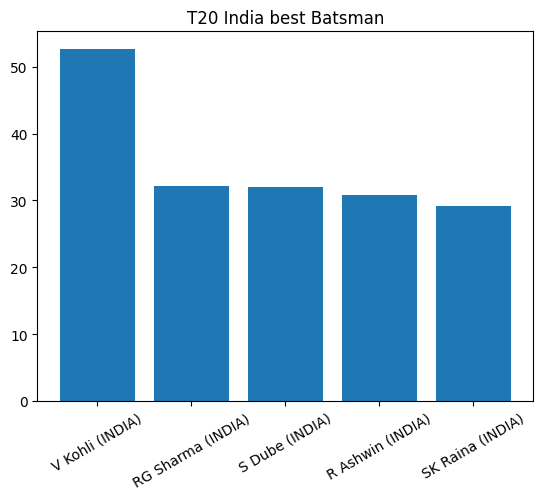

In [ ]:
plt.bar(t20_ind_bat.index,t20_ind_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('T20 India best Batsman')

Text(0.5, 1.0, 'T20 India best Bowler')

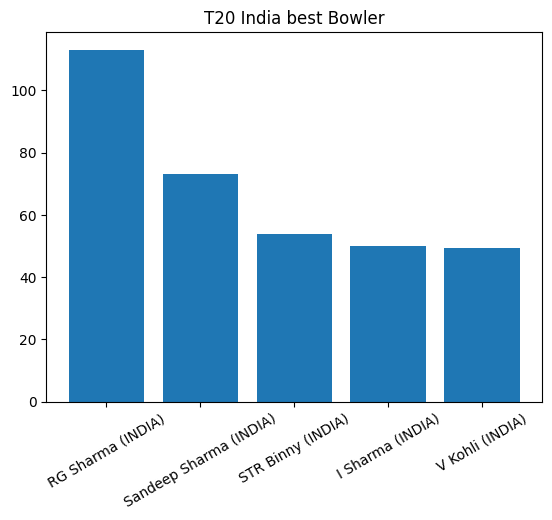

In [ ]:
plt.bar(t20_ind_bow.index,t20_ind_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('T20 India best Bowler')

Text(0.5, 1.0, 'T20 India Best Fielder')

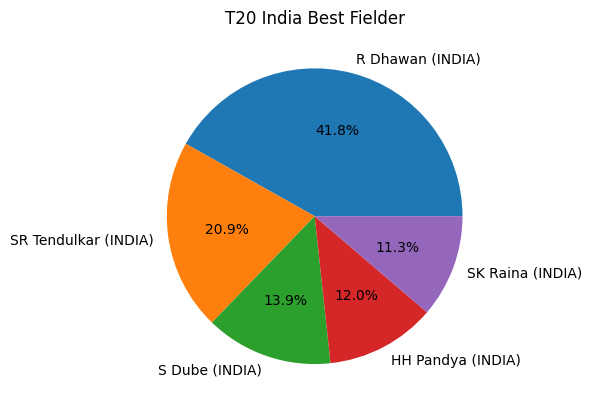

In [ ]:
plt.pie(t20_ind_field['D/I'],labels = t20_ind_field.index,autopct='%1.1f%%')
plt.title('T20 India Best Fielder')

In [ ]:
sl_player = data1[data1['country']=='SL']
grp_data = sl_player.groupby('Player').sum()
t20_sl_bat = grp_data.sort_values(by='Ave_x',ascending = False).head()
t20_sl_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
t20_sl_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'T20 SL Best Batsman')

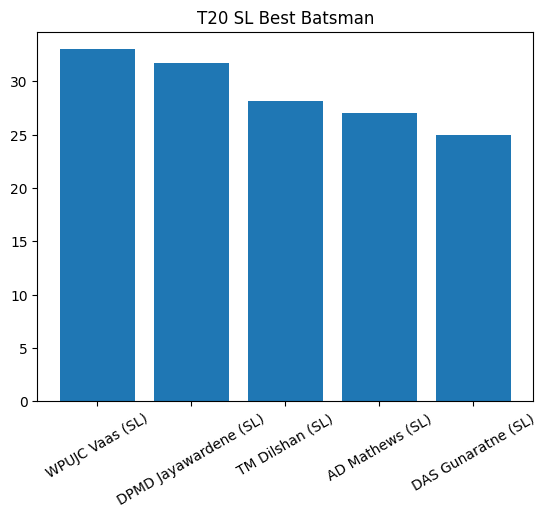

In [ ]:
plt.bar(t20_sl_bat.index,t20_sl_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('T20 SL Best Batsman')

Text(0.5, 1.0, 'T20 SL Best Bowler')

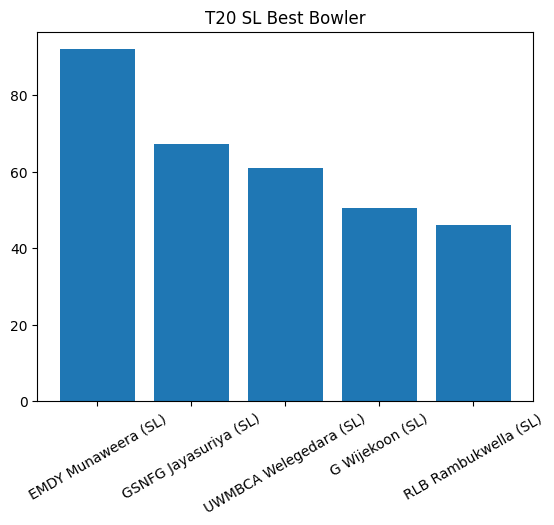

In [ ]:
plt.bar(t20_sl_bow.index,t20_sl_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('T20 SL Best Bowler')

Text(0.5, 1.0, 'T20 SL Best Fielder')

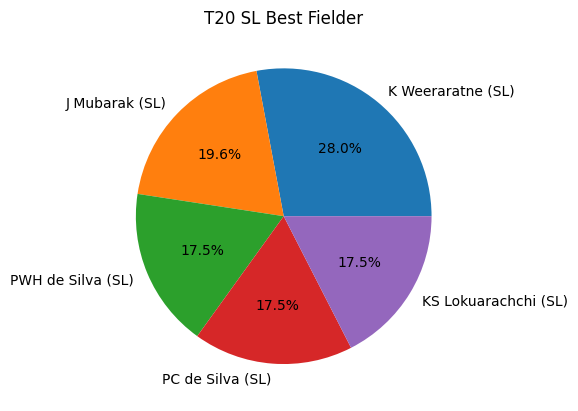

In [ ]:
plt.pie(t20_sl_field['D/I'],labels=t20_sl_field.index,autopct='%1.1f%%')
plt.title('T20 SL Best Fielder')

In [ ]:
aus_player = data1[data1['country']=='AUS']
grp_data = aus_player.groupby('Player').sum()
t20_aus_bat = grp_data.sort_values(by='Ave_x',ascending = False).head()
t20_aus_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
t20_aus_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'T20 AUS Best Batsman')

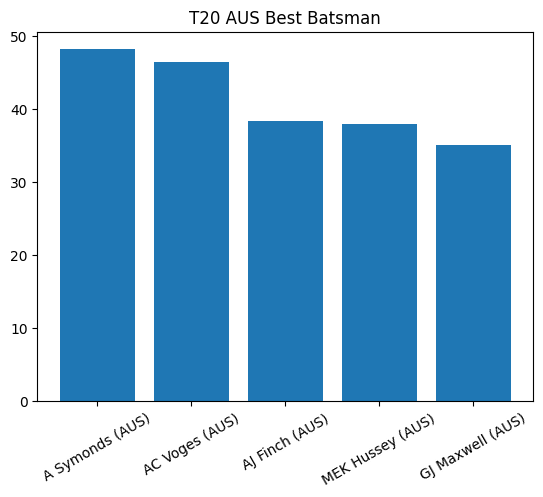

In [ ]:
plt.bar(t20_aus_bat.index,t20_aus_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('T20 AUS Best Batsman')

Text(0.5, 1.0, 'T20 AUS Best Bowler')

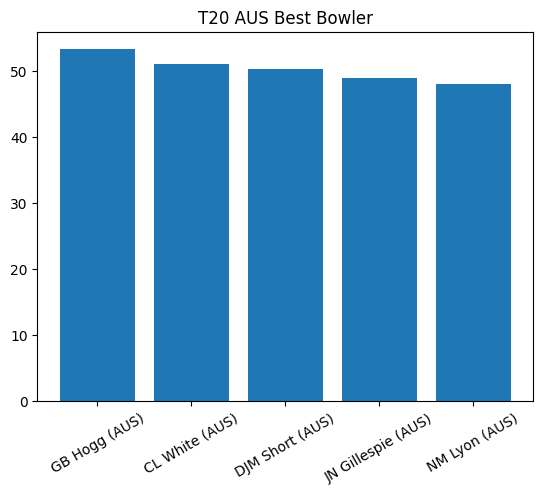

In [ ]:
plt.bar(t20_aus_bow.index,t20_aus_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('T20 AUS Best Bowler')

Text(0.5, 1.0, 'T20 AUS Best Fielder')

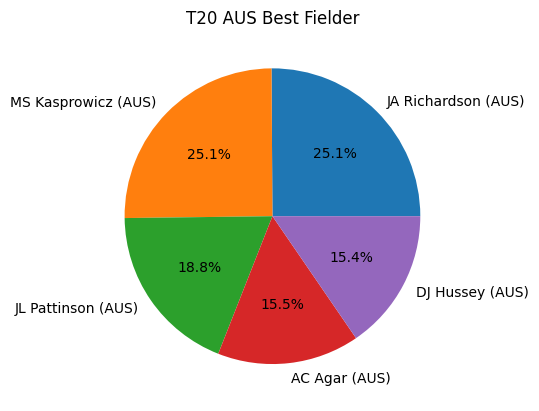

In [ ]:
plt.pie(t20_aus_field['D/I'],labels=t20_aus_field.index,autopct='%1.1f%%')
plt.title('T20 AUS Best Fielder')

In [ ]:
nz_player = data1[data1['country']=='NZ']
grp_data = nz_player.groupby('Player').sum()
t20_nz_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
t20_nz_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
t20_nz_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'T20 NZ Best Batsman')

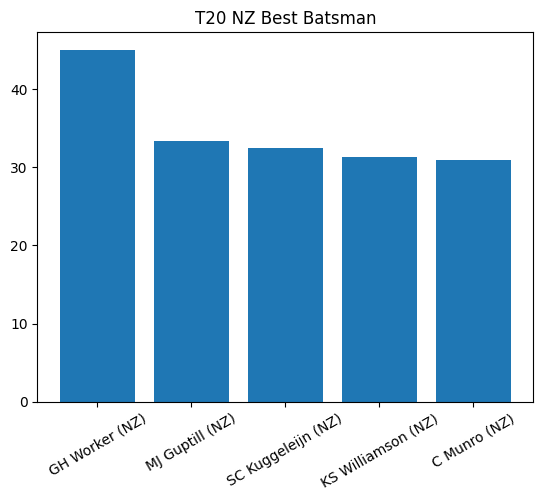

In [ ]:
plt.bar(t20_nz_bat.index,t20_nz_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('T20 NZ Best Batsman')

Text(0.5, 1.0, 'T20 NZ Best Bowler')

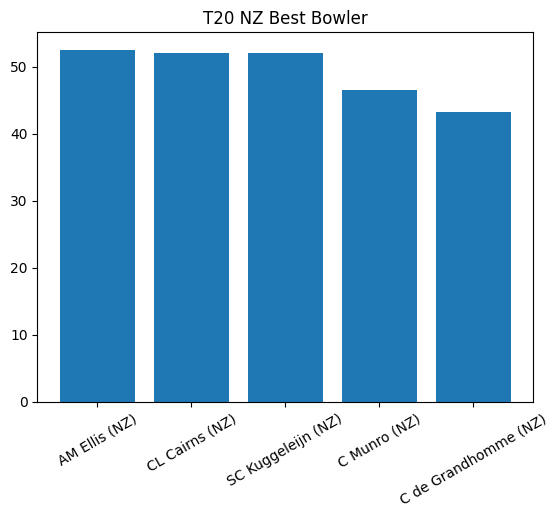

In [ ]:
plt.bar(t20_nz_bow.index,t20_nz_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('T20 NZ Best Bowler')

Text(0.5, 1.0, 'T20 AUS Best Fielder')

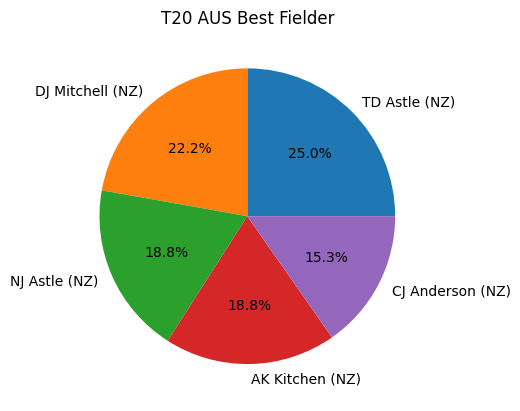

In [ ]:
plt.pie(t20_nz_field['D/I'],labels=t20_nz_field.index,autopct='%1.1f%%')
plt.title('T20 AUS Best Fielder')

In [ ]:
eng_player = data1[data1['country']=='ENG']
grp_data = eng_player.groupby('Player').sum()
t20_eng_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
t20_eng_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
t20_eng_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'T20 Eng Best Batsman')

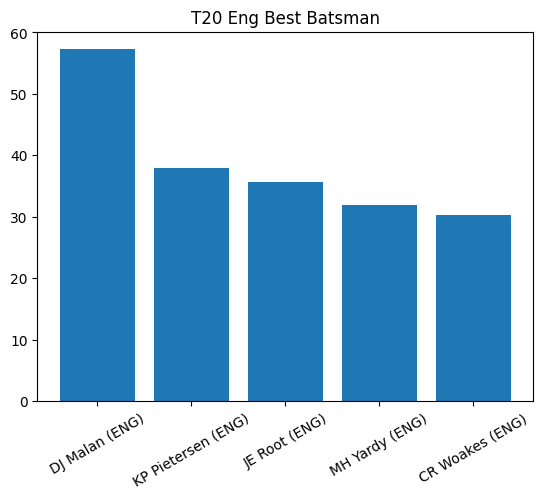

In [ ]:
plt.bar(t20_eng_bat.index,t20_eng_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('T20 Eng Best Batsman')

Text(0.5, 1.0, 'T20 Eng Best Bowler')

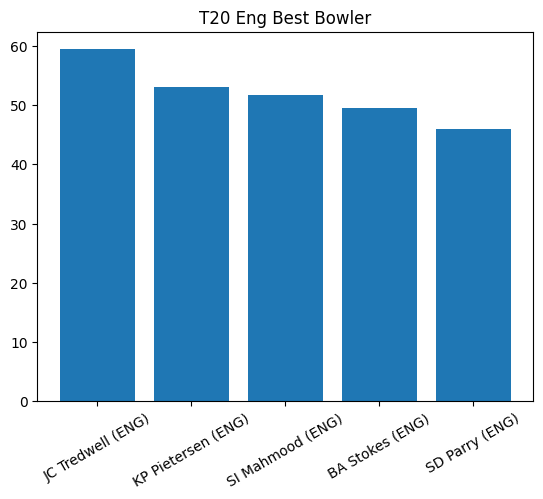

In [ ]:
plt.bar(t20_eng_bow.index,t20_eng_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('T20 Eng Best Bowler')

Text(0.5, 1.0, 'T20 Eng Best Fielder')

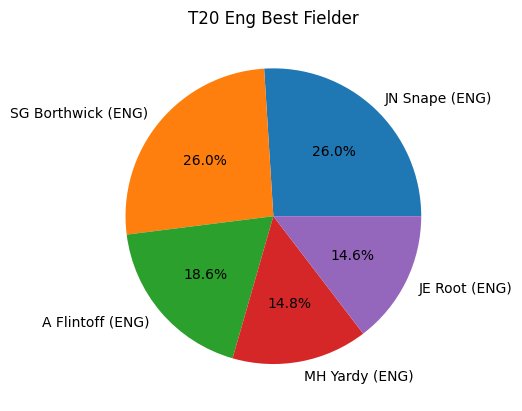

In [ ]:
plt.pie(t20_eng_field['D/I'],labels=t20_eng_field.index,autopct='%1.1f%%')
plt.title('T20 Eng Best Fielder')

## **Test data cleaning**

In [ ]:
test_bat.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9


In [ ]:
test_bat = test_bat.drop(test_bat.index[-20:])
test_bat.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
2976,M Venkataramana (INDIA),1989-1989,1,2,2,0,0*,-,0,0,0
2977,DW White (ENG),1961-1962,2,2,0,0,0,0.00,0,0,2
2978,P Wilson (AUS),1998-1998,1,2,2,0,0*,-,0,0,0
2979,CS Wimble (SA),1892-1892,1,2,0,0,0,0.00,0,0,2
2980,Zahir Khan (AFG),2019-2019,2,4,3,0,0*,0.00,0,0,1


In [ ]:
test_bat['Ave'].replace('-',np.nan,inplace=True)
test_bat['Ave'].isnull().sum()

68

In [ ]:
test_bat['Ave'].fillna(0,inplace=True)
test_bat['Ave'].isnull().sum()

0

In [ ]:
test_bat['HS']= test_bat['HS'].str.replace('*','')
test_bat['HS'].head()

,HS
0,248
1,257
2,224
3,270
4,294


In [ ]:
test_bat.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248,53.78,51,68,14


In [ ]:
test_bat['Mat']=test_bat['Mat'].astype(int)
test_bat['Inns']=test_bat['Inns'].astype(int)
test_bat['NO'] = test_bat['NO'].astype(int)
test_bat['Runs'] = test_bat['Runs'].astype(int)
test_bat['HS'] = test_bat['HS'].astype(int)
test_bat['Ave'] = test_bat['Ave'].astype(float)
test_bat['100'] = test_bat['100'].astype(int)
test_bat['50'] = test_bat['50'].astype(int)
test_bat['0'] = test_bat['0'].astype(int)

**test bowling**

In [ ]:
test_bow.head()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
0,M Muralitharan (ICC/SL),1992-2010,133,230,44039,18180,800,9/51,16/220,22.72,2.47,55.0,67,22
1,SK Warne (AUS),1992-2007,145,273,40705,17995,708,8/71,12/128,25.41,2.65,57.4,37,10
2,A Kumble (INDIA),1990-2008,132,236,40850,18355,619,10/74,14/149,29.65,2.69,65.9,35,8
3,JM Anderson (ENG),2003-2019,150,280,32557,15607,577,7/42,11/71,27.04,2.87,56.4,27,3
4,GD McGrath (AUS),1993-2007,124,243,29248,12186,563,8/24,10/27,21.64,2.49,51.9,29,3


In [ ]:
test_bow.tail()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
3045,MA Holding (WI),1975-1987,60,113,12680,5898,249,8/92,14/149,23.68,2.79,50.9,13,2
3046,R Benaud (AUS),1952-1964,63,116,19108,6704,248,7/72,11/105,27.03,2.10,77.0,16,1
3047,MJ Hoggard (ENG),2000-2008,67,122,13909,7564,248,7/61,12/205,30.50,3.26,56.0,7,1
3048,GD McKenzie (AUS),1961-1971,60,113,17681,7328,246,8/71,10/91,29.78,2.48,71.8,16,3
3049,BS Chandrasekhar (INDIA),1964-1979,58,97,15963,7199,242,8/79,12/104,29.74,2.70,65.9,16,2


In [ ]:
test_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3050 non-null   object 
 1   Span    3050 non-null   object 
 2   Mat     3050 non-null   int64  
 3   Inns    3050 non-null   int64  
 4   Balls   3050 non-null   int64  
 5   Runs    3050 non-null   int64  
 6   Wkts    3050 non-null   int64  
 7   BBI     3050 non-null   object 
 8   BBM     3050 non-null   object 
 9   Ave     3050 non-null   float64
 10  Econ    3050 non-null   float64
 11  SR      3050 non-null   float64
 12  5       3050 non-null   int64  
 13  10      3050 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 333.7+ KB


In [ ]:
test_bow.head(1)

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
0,M Muralitharan (ICC/SL),1992-2010,133,230,44039,18180,800,9/51,16/220,22.72,2.47,55.0,67,22


In [ ]:
test_bow['Inns']=test_bow['Inns'].astype(int)
test_bow['Balls']=test_bow['Balls'].astype(int)
test_bow['Runs']=test_bow['Runs'].astype(int)
test_bow['Wkts']=test_bow['Wkts'].astype(int)
test_bow['5']=test_bow['5'].astype(int)
test_bow['10']=test_bow['10'].astype(int)
test_bow['SR']=test_bow['SR'].astype(float)
test_bow['Econ']=test_bow['Econ'].astype(float)
test_bow['Ave']=test_bow['Ave'].astype(float)

Test fielding

In [ ]:
test_field.head()

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,MV Boucher (ICC/SA),1997-2012,147,281,555,532,23,532,0,6 (6ct 0st),1.975
1,AC Gilchrist (AUS),1999-2008,96,191,416,379,37,379,0,5 (5ct 0st),2.178
2,IA Healy (AUS),1988-1999,119,224,395,366,29,366,0,6 (6ct 0st),1.763
3,RW Marsh (AUS),1970-1984,96,182,355,343,12,343,0,6 (6ct 0st),1.950
4,MS Dhoni (INDIA),2005-2014,90,166,294,256,38,256,0,6 (6ct 0st),1.771


In [ ]:
test_field.head(1)

,Player,Span,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,MV Boucher (ICC/SA),1997-2012,147,281,555,532,23,532,0,6 (6ct 0st),1.975


In [ ]:
test_field['Mat']=test_field['Mat'].astype(int)
test_field['Inns']=test_field['Inns'].astype(int)
test_field['Dis']=test_field['Dis'].astype(int)
test_field['Ct']=test_field['Ct'].astype(int)
test_field['St']=test_field['St'].astype(int)
test_field['Ct Wk']=test_field['Ct Wk'].astype(int)
test_field['Ct Fi']=test_field['Ct Fi'].astype(int)
test_field['D/I']=test_field['D/I'].astype(float)

**merge bat, bow and field dataset**

In [ ]:
data2 = pd.merge(test_bat,test_bow,how='inner',right_on=['Player','Span'],left_on=['Player','Span']).merge(test_field,how='inner',on=['Player','Span'])

In [ ]:
data2 = data2.drop_duplicates()
data2.head()

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,100,50,...,10,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,...,0,166,315,200,200,0,0,200,4 (4ct 0st),0.634
61,N Kapil Dev (INDIA),1978-1994,131,184,15,5248,163,31.05,8,27,...,2,131,230,64,64,0,0,64,2 (2ct 0st),0.278
122,IT Botham (ENG),1977-1992,102,161,6,5200,208,33.54,14,22,...,4,102,179,120,120,0,0,120,3 (3ct 0st),0.670
183,DL Vettori (ICC/NZ),1997-2014,113,174,23,4531,140,30.00,6,23,...,3,113,205,58,58,0,0,58,3 (3ct 0st),0.282
244,Imran Khan (PAK),1971-1992,88,126,25,3807,136,37.69,6,18,...,6,88,158,28,28,0,0,28,3 (3ct 0st),0.177


In [ ]:
data2['country'] = data2['Player'].apply(lambda x: x.split('(')[1].split(')')[0] if '(' in x and ')' in x else '')
data2['country'] = data2['country'].apply(val_col)
data2.head()

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,100,50,...,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,country
0,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,...,166,315,200,200,0,0,200,4 (4ct 0st),0.634,SA
61,N Kapil Dev (INDIA),1978-1994,131,184,15,5248,163,31.05,8,27,...,131,230,64,64,0,0,64,2 (2ct 0st),0.278,INDIA
122,IT Botham (ENG),1977-1992,102,161,6,5200,208,33.54,14,22,...,102,179,120,120,0,0,120,3 (3ct 0st),0.670,ENG
183,DL Vettori (ICC/NZ),1997-2014,113,174,23,4531,140,30.00,6,23,...,113,205,58,58,0,0,58,3 (3ct 0st),0.282,NZ
244,Imran Khan (PAK),1971-1992,88,126,25,3807,136,37.69,6,18,...,88,158,28,28,0,0,28,3 (3ct 0st),0.177,PAK


In [ ]:
ind_player = data2[data2['country']=='INDIA']
grp_data = ind_player.groupby('Player').sum()
test_ind_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
test_ind_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
test_ind_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'Test Indian Best batsman')

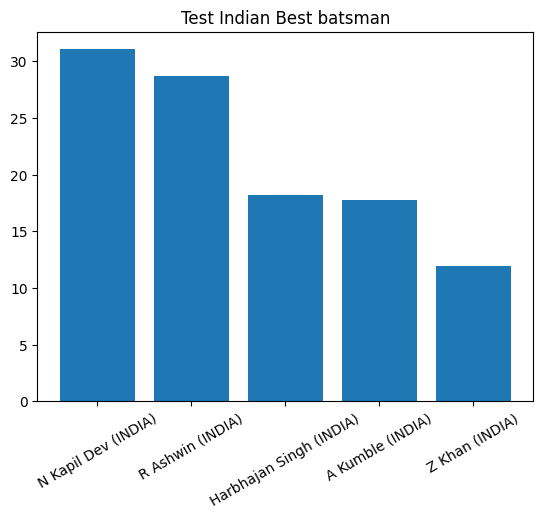

In [ ]:
plt.bar(test_ind_bat.index,test_ind_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('Test Indian Best batsman')

Text(0.5, 1.0, 'Test India best Bowler')

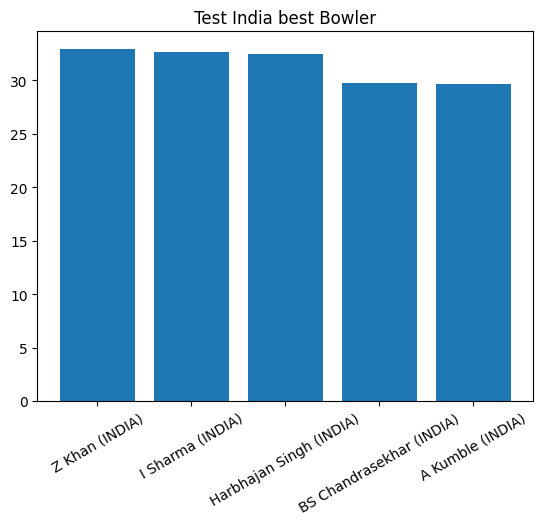

In [ ]:
plt.bar(test_ind_bow.index,test_ind_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('Test India best Bowler')

Text(0.5, 1.0, 'Test India Best Fielder')

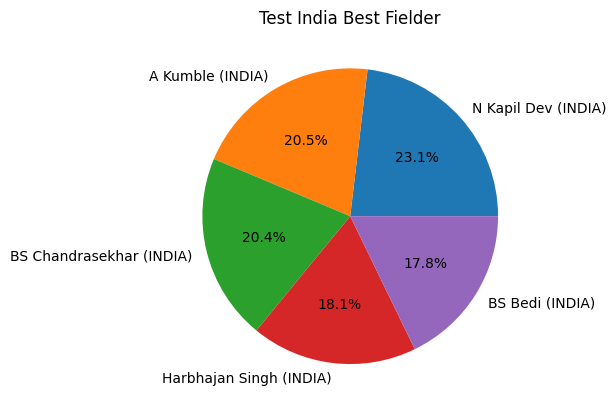

In [ ]:
plt.pie(test_ind_field['D/I'],labels=test_ind_field.index,autopct='%1.1f%%')
plt.title('Test India Best Fielder')

In [ ]:
eng_player = data2[data2['country']=='ENG']
grp_data = eng_player.groupby('Player').sum()
test_eng_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
test_eng_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
test_eng_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'Test England best Batsman')

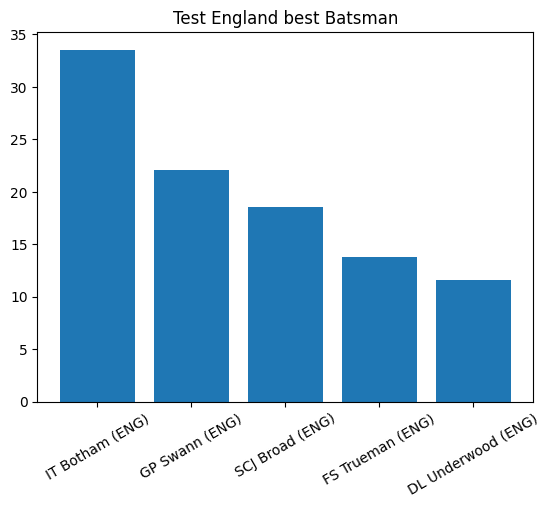

In [ ]:
plt.bar(test_eng_bat.index,test_eng_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('Test England best Batsman')

Text(0.5, 1.0, 'Test England best Bowler')

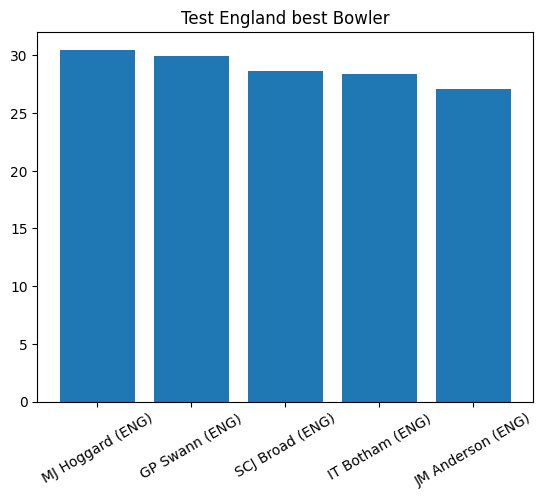

In [ ]:
plt.bar(test_eng_bow.index,test_eng_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('Test England best Bowler')

Text(0.5, 1.0, 'Test England Best Fielder')

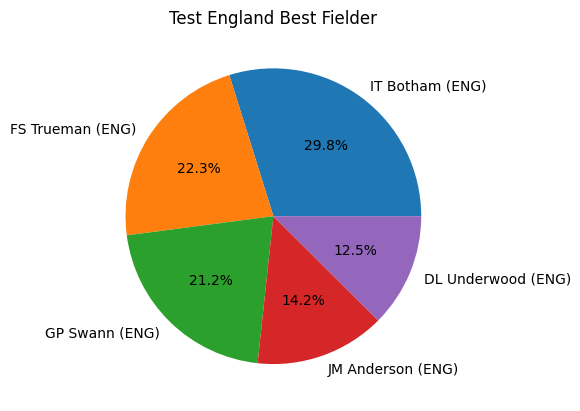

In [ ]:
plt.pie(test_eng_field['D/I'],labels=test_eng_field.index,autopct='%1.1f%%')
plt.title('Test England Best Fielder')

In [ ]:
aus_player = data2[data2['country']=='AUS']
grp_data = aus_player.groupby('Player').sum()
test_aus_bat = grp_data.sort_values(by='Ave_x',ascending=False).head()
test_aus_bow = grp_data.sort_values(by='Ave_y',ascending=False).head()
test_aus_field = grp_data.sort_values(by='D/I',ascending=False).head()

Text(0.5, 1.0, 'Test Aus best Bating')

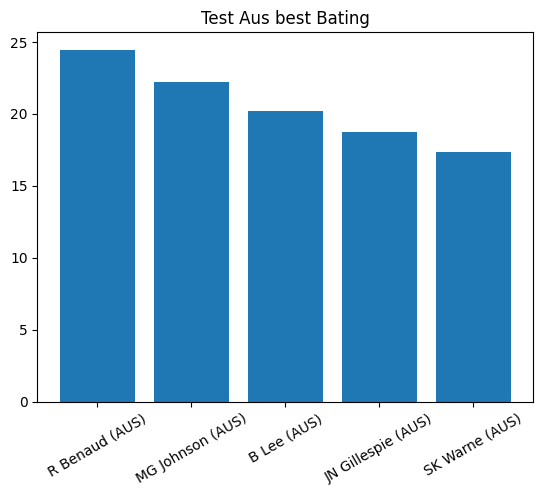

In [ ]:
plt.bar(test_aus_bat.index,test_aus_bat['Ave_x'])
plt.xticks(rotation=30)
plt.title('Test Aus best Bating')

Text(0.5, 1.0, 'Test Aus best Bowler')

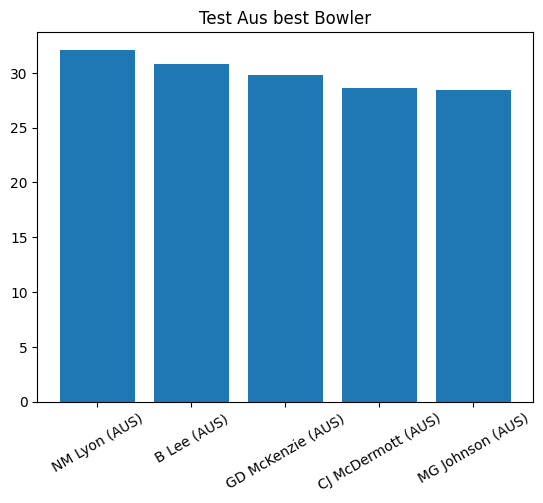

In [ ]:
plt.bar(test_aus_bow.index,test_aus_bow['Ave_y'])
plt.xticks(rotation=30)
plt.title('Test Aus best Bowler')

Text(0.5, 1.0, 'Test Aus Best Fielder')

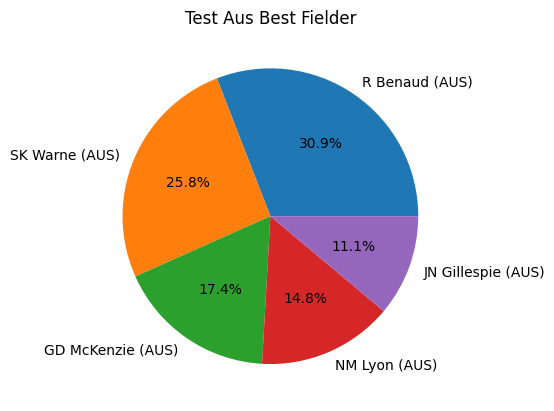

In [ ]:
plt.pie(test_aus_field['D/I'],labels=test_aus_field.index,autopct='%1.1f%%')
plt.title('Test Aus Best Fielder')

## **All data Visualization**

[Text(0.0, 0, 'R Dhawan (INDIA)'),
 Text(1.0, 0, 'SR Tendulkar (INDIA)'),
 Text(2.0, 0, 'S Dube (INDIA)'),
 Text(3.0, 0, 'HH Pandya (INDIA)'),
 Text(4.0, 0, 'SK Raina (INDIA)')]

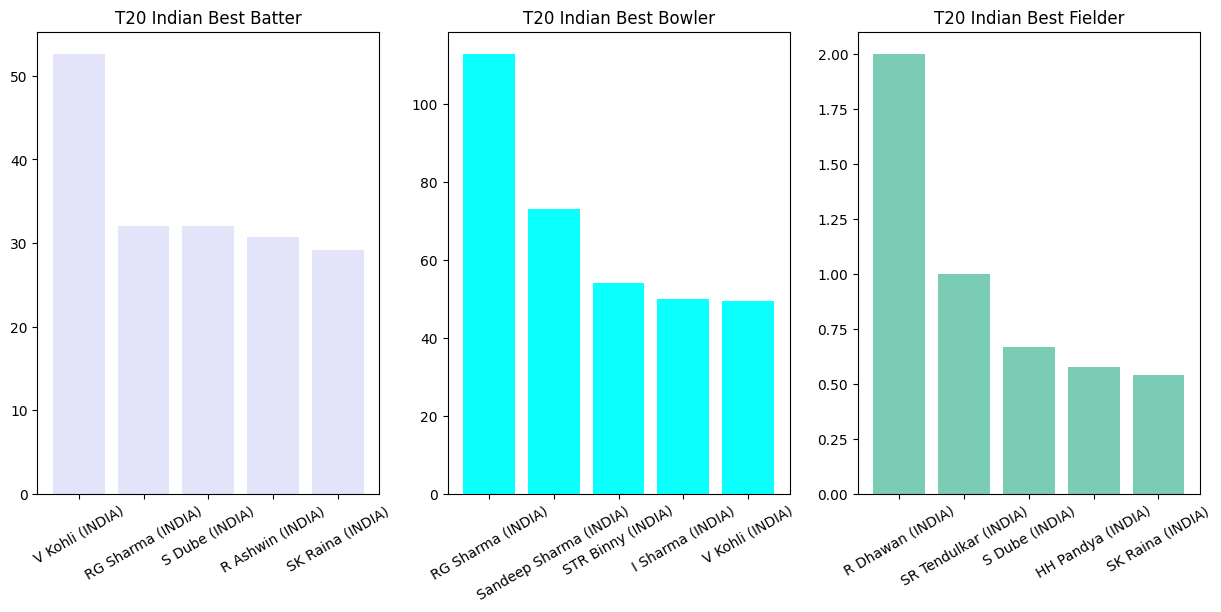

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(t20_ind_bat.index,t20_ind_bat['Ave_x'],color='#E3E4FA')
axs[0].set_title('T20 Indian Best Batter')
axs[0].set_xticks(t20_ind_bat.index)
axs[0].set_xticklabels(t20_ind_bat.index, rotation=30)

axs[1].bar(t20_ind_bow.index,t20_ind_bow['Ave_y'],color='#0AFFFF')
axs[1].set_title('T20 Indian Best Bowler')
axs[1].set_xticks(t20_ind_bow.index)
axs[1].set_xticklabels(t20_ind_bow.index, rotation=30)

axs[2].bar(t20_ind_field.index,t20_ind_field['D/I'],color='#7BCCB5')
axs[2].set_title('T20 Indian Best Fielder')
axs[2].set_xticks(t20_ind_field.index)
axs[2].set_xticklabels(t20_ind_field.index, rotation=30)

[Text(0.0, 0, 'K Weeraratne (SL)'),
 Text(1.0, 0, 'J Mubarak (SL)'),
 Text(2.0, 0, 'PWH de Silva (SL)'),
 Text(3.0, 0, 'PC de Silva (SL)'),
 Text(4.0, 0, 'KS Lokuarachchi (SL)')]

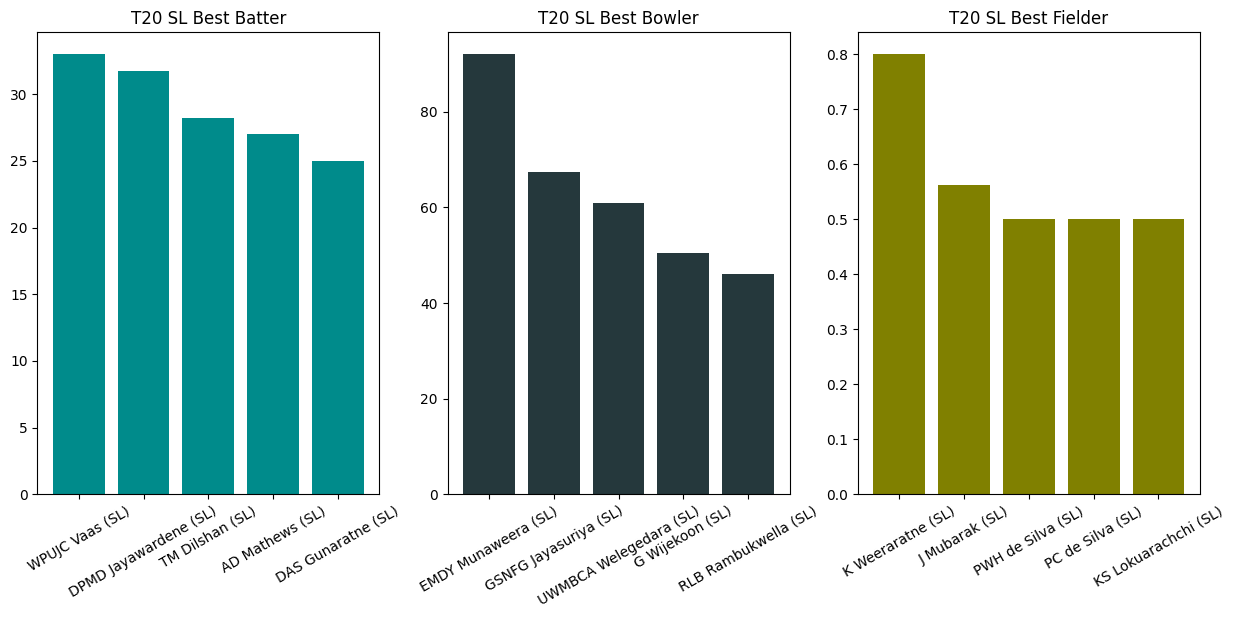

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(t20_sl_bat.index,t20_sl_bat['Ave_x'],color='#008B8B')
axs[0].set_title('T20 SL Best Batter')
axs[0].set_xticks(t20_sl_bat.index)
axs[0].set_xticklabels(t20_sl_bat.index, rotation=30)

axs[1].bar(t20_sl_bow.index,t20_sl_bow['Ave_y'],color='#25383C')
axs[1].set_title('T20 SL Best Bowler')
axs[1].set_xticks(t20_sl_bow.index)
axs[1].set_xticklabels(t20_sl_bow.index, rotation=30)

axs[2].bar(t20_sl_field.index,t20_sl_field['D/I'],color='#808000')
axs[2].set_title('T20 SL Best Fielder')
axs[2].set_xticks(t20_sl_field.index)
axs[2].set_xticklabels(t20_sl_field.index, rotation=30)

[Text(0.0, 0, 'JA Richardson (AUS)'),
 Text(1.0, 0, 'MS Kasprowicz (AUS)'),
 Text(2.0, 0, 'JL Pattinson (AUS)'),
 Text(3.0, 0, 'AC Agar (AUS)'),
 Text(4.0, 0, 'DJ Hussey (AUS)')]

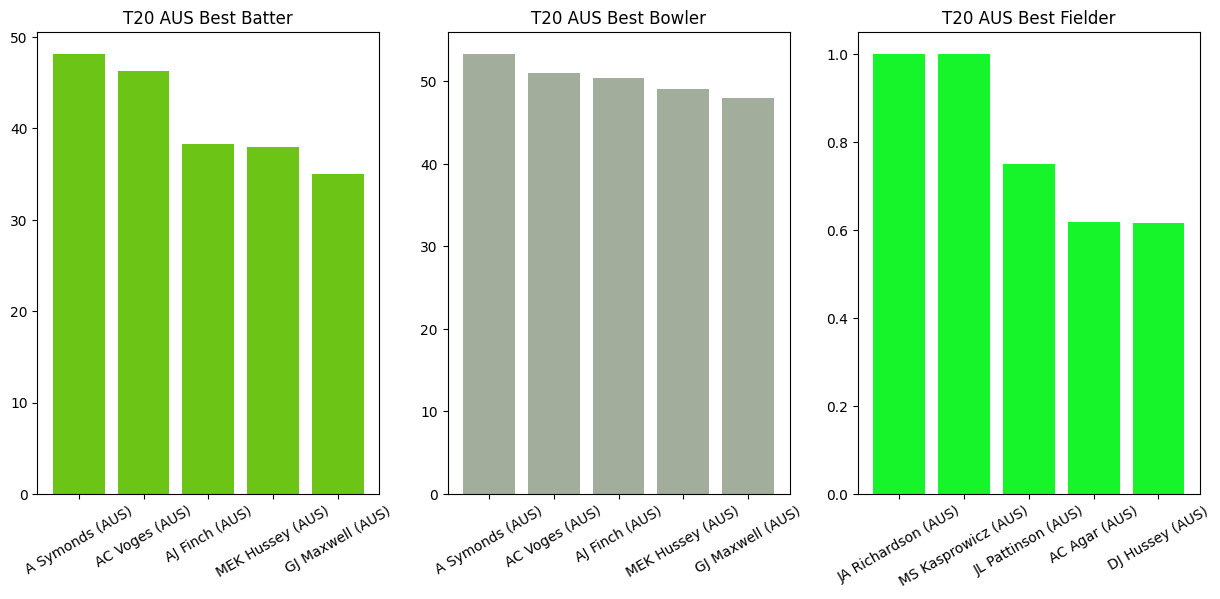

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(t20_aus_bat.index,t20_aus_bat['Ave_x'],color='#6CC417')
axs[0].set_title('T20 AUS Best Batter')
axs[0].set_xticks(t20_aus_bat.index)
axs[0].set_xticklabels(t20_aus_bat.index, rotation=30)

axs[1].bar(t20_aus_bow.index,t20_aus_bow['Ave_y'],color='#A2AD9C')
axs[1].set_title('T20 AUS Best Bowler')
axs[1].set_xticks(t20_aus_bow.index)
axs[1].set_xticklabels(t20_aus_bat.index, rotation=30)

axs[2].bar(t20_aus_field.index,t20_aus_field['D/I'],color='#16F529')
axs[2].set_title('T20 AUS Best Fielder')
axs[2].set_xticks(t20_aus_field.index)
axs[2].set_xticklabels(t20_aus_field.index, rotation=30)

[Text(0.0, 0, 'TD Astle (NZ)'),
 Text(1.0, 0, 'DJ Mitchell (NZ)'),
 Text(2.0, 0, 'NJ Astle (NZ)'),
 Text(3.0, 0, 'AK Kitchen (NZ)'),
 Text(4.0, 0, 'CJ Anderson (NZ)')]

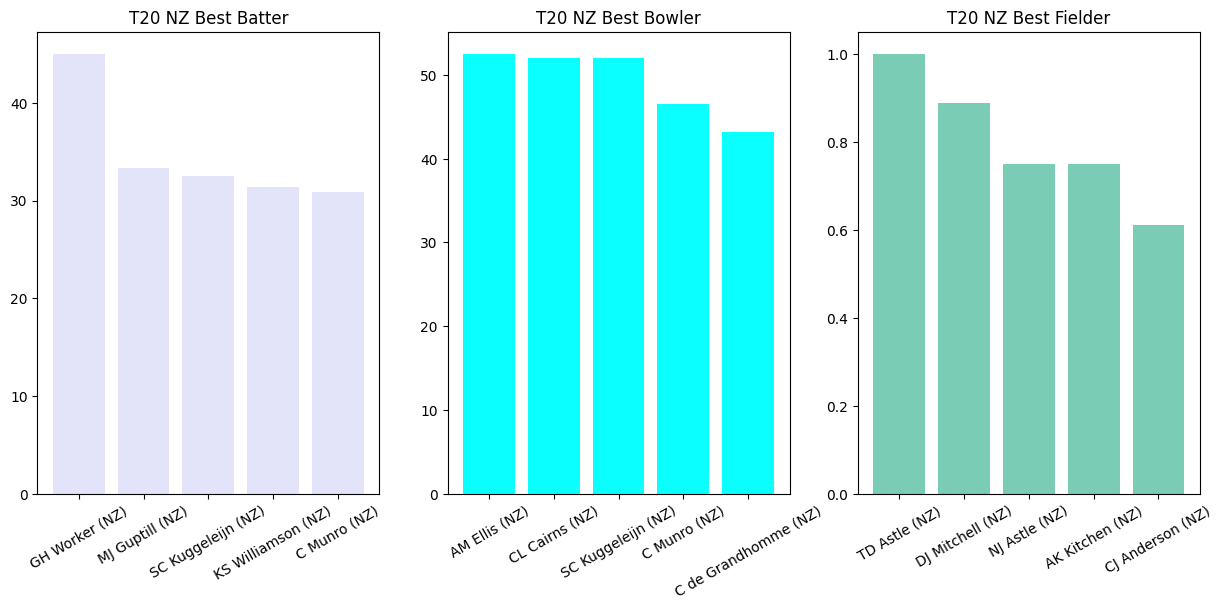

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(t20_nz_bat.index,t20_nz_bat['Ave_x'],color='#E3E4FA')
axs[0].set_title('T20 NZ Best Batter')
axs[0].set_xticks(t20_nz_bat.index)
axs[0].set_xticklabels(t20_nz_bat.index, rotation=30)

axs[1].bar(t20_nz_bow.index,t20_nz_bow['Ave_y'],color='#0AFFFF')
axs[1].set_title('T20 NZ Best Bowler')
axs[1].set_xticks(t20_nz_bow.index)
axs[1].set_xticklabels(t20_nz_bow.index, rotation=30)

axs[2].bar(t20_nz_field.index,t20_nz_field['D/I'],color='#7BCCB5')
axs[2].set_title('T20 NZ Best Fielder')
axs[2].set_xticks(t20_nz_field.index)
axs[2].set_xticklabels(t20_nz_field.index, rotation=30)

[Text(0.0, 0, 'JN Snape (ENG)'),
 Text(1.0, 0, 'SG Borthwick (ENG)'),
 Text(2.0, 0, 'A Flintoff (ENG)'),
 Text(3.0, 0, 'MH Yardy (ENG)'),
 Text(4.0, 0, 'JE Root (ENG)')]

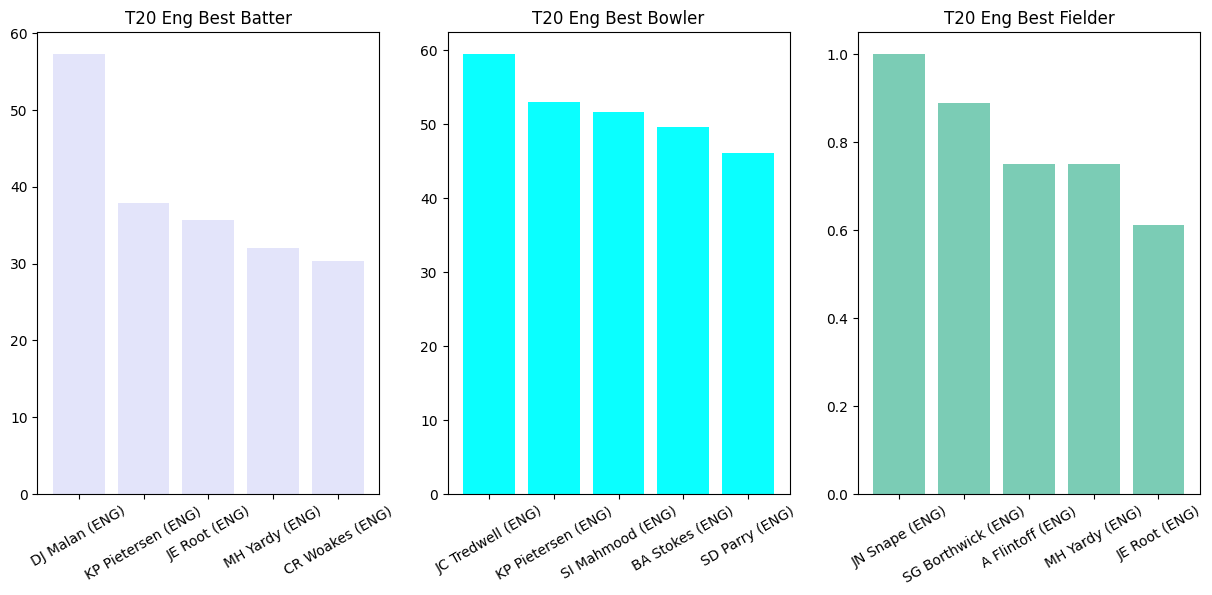

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(t20_eng_bat.index,t20_eng_bat['Ave_x'],color='#E3E4FA')
axs[0].set_title('T20 Eng Best Batter')
axs[0].set_xticks(t20_eng_bat.index)
axs[0].set_xticklabels(t20_eng_bat.index, rotation=30)

axs[1].bar(t20_eng_bow.index,t20_eng_bow['Ave_y'],color='#0AFFFF')
axs[1].set_title('T20 Eng Best Bowler')
axs[1].set_xticks(t20_eng_bow.index)
axs[1].set_xticklabels(t20_eng_bow.index, rotation=30)

axs[2].bar(t20_eng_field.index,t20_nz_field['D/I'],color='#7BCCB5')
axs[2].set_title('T20 Eng Best Fielder')
axs[2].set_xticks(t20_eng_field.index)
axs[2].set_xticklabels(t20_eng_field.index, rotation=30)

[Text(0.0, 0, 'N Kapil Dev (INDIA)'),
 Text(1.0, 0, 'A Kumble (INDIA)'),
 Text(2.0, 0, 'BS Chandrasekhar (INDIA)'),
 Text(3.0, 0, 'Harbhajan Singh (INDIA)'),
 Text(4.0, 0, 'BS Bedi (INDIA)')]

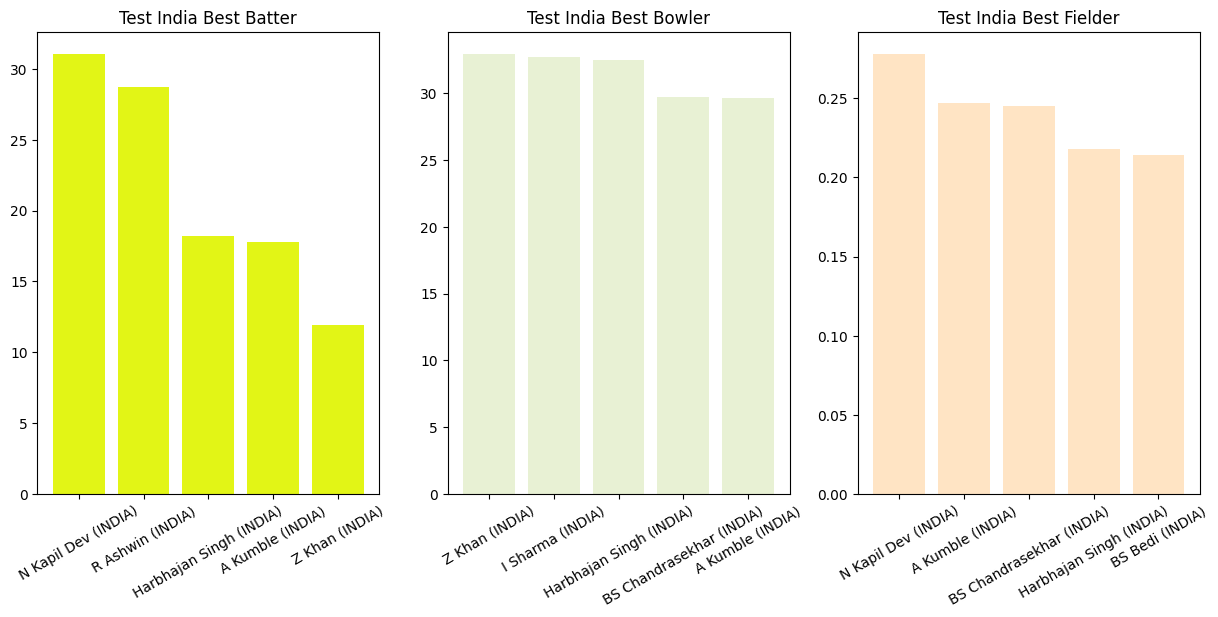

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(test_ind_bat.index,test_ind_bat['Ave_x'],color='#E2F516')
axs[0].set_title('Test India Best Batter')
axs[0].set_xticks(test_ind_bat.index)
axs[0].set_xticklabels(test_ind_bat.index, rotation=30)

axs[1].bar(test_ind_bow.index,test_ind_bow['Ave_y'],color='#E8F1D4')
axs[1].set_title('Test India Best Bowler')
axs[1].set_xticks(test_ind_bow.index)
axs[1].set_xticklabels(test_ind_bow.index, rotation=30)

axs[2].bar(test_ind_field.index,test_ind_field['D/I'],color='#FFE4C4')
axs[2].set_title('Test India Best Fielder')
axs[2].set_xticks(test_ind_field.index)
axs[2].set_xticklabels(test_ind_field.index, rotation=30)

[Text(0.0, 0, 'R Benaud (AUS)'),
 Text(1.0, 0, 'SK Warne (AUS)'),
 Text(2.0, 0, 'GD McKenzie (AUS)'),
 Text(3.0, 0, 'NM Lyon (AUS)'),
 Text(4.0, 0, 'JN Gillespie (AUS)')]

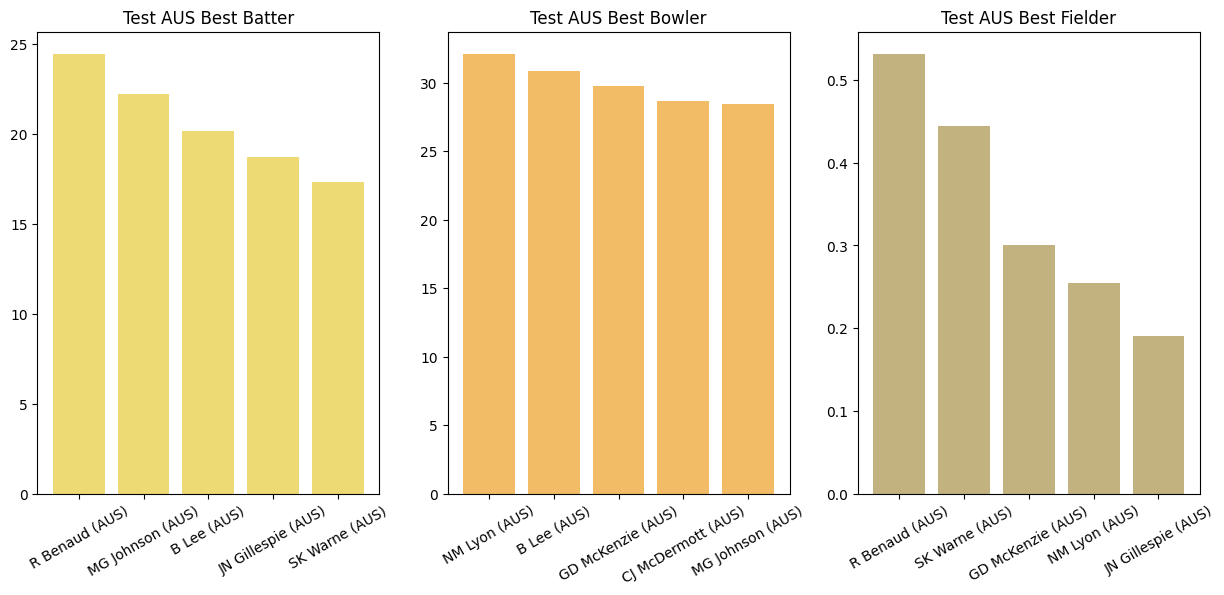

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(test_aus_bat.index,test_aus_bat['Ave_x'],color='#EDDA74')
axs[0].set_title('Test AUS Best Batter')
axs[0].set_xticks(test_aus_bat.index)
axs[0].set_xticklabels(test_aus_bat.index, rotation=30)

axs[1].bar(test_aus_bow.index,test_aus_bow['Ave_y'],color='#F2BB66')
axs[1].set_title('Test AUS Best Bowler')
axs[1].set_xticks(test_aus_bow.index)
axs[1].set_xticklabels(test_aus_bow.index, rotation=30)

axs[2].bar(test_aus_field.index,test_aus_field['D/I'],color='#C2B280')
axs[2].set_title('Test AUS Best Fielder')
axs[2].set_xticks(test_aus_field.index)
axs[2].set_xticklabels(test_aus_field.index, rotation=30)

[Text(0.0, 0, 'IT Botham (ENG)'),
 Text(1.0, 0, 'FS Trueman (ENG)'),
 Text(2.0, 0, 'GP Swann (ENG)'),
 Text(3.0, 0, 'JM Anderson (ENG)'),
 Text(4.0, 0, 'DL Underwood (ENG)')]

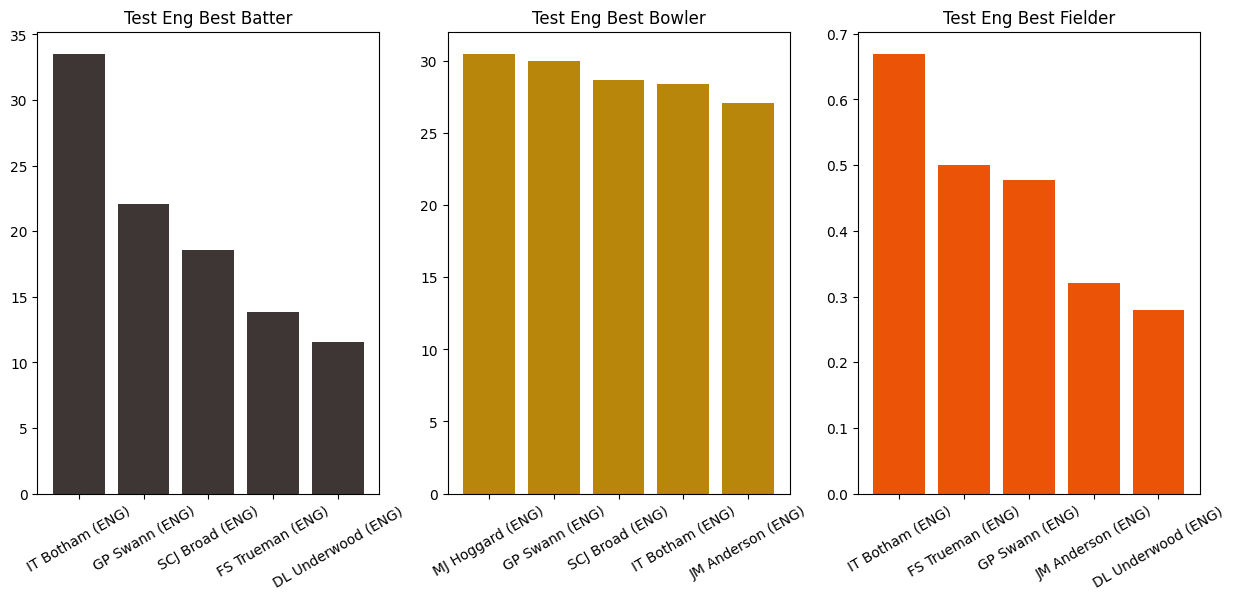

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(test_eng_bat.index,test_eng_bat['Ave_x'],color='#3D3635')
axs[0].set_title('Test Eng Best Batter')
axs[0].set_xticks(test_eng_bat.index)
axs[0].set_xticklabels(test_eng_bat.index, rotation=30)

axs[1].bar(test_eng_bow.index,test_eng_bow['Ave_y'],color='#B8860B')
axs[1].set_title('Test Eng Best Bowler')
axs[1].set_xticks(test_eng_bow.index)
axs[1].set_xticklabels(test_eng_bow.index, rotation=30)

axs[2].bar(test_eng_field.index,test_eng_field['D/I'],color='#EB5406')
axs[2].set_title('Test Eng Best Fielder')
axs[2].set_xticks(test_eng_field.index)
axs[2].set_xticklabels(test_eng_field.index, rotation=30)

[Text(0.0, 0, 'MS Dhoni (Asia/INDIA)'),
 Text(1.0, 0, 'R Dravid (Asia/ICC/INDIA)'),
 Text(2.0, 0, 'V Kohli (INDIA)'),
 Text(3.0, 0, 'M Azharuddin (INDIA)'),
 Text(4.0, 0, 'SR Tendulkar (INDIA)')]

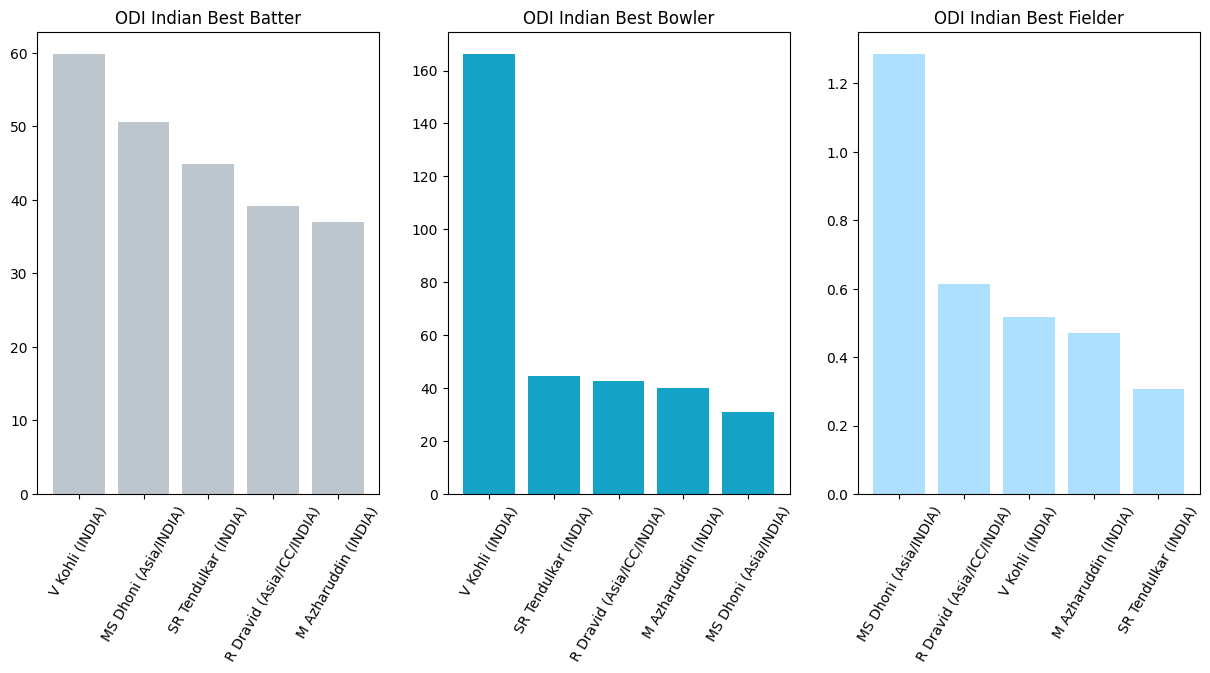

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(odi_ind_bat.index,odi_ind_bat['Ave_x'],color='#BCC6CC')
axs[0].set_title('ODI Indian Best Batter')
axs[0].set_xticks(odi_ind_bat.index)
axs[0].set_xticklabels(odi_ind_bat.index, rotation=60)

axs[1].bar(odi_ind_bow.index,odi_ind_bow['Ave_y'],color='#14A3C7')
axs[1].set_title('ODI Indian Best Bowler')
axs[1].set_xticks(odi_ind_bow.index)
axs[1].set_xticklabels(odi_ind_bow.index, rotation=60)

axs[2].bar(odi_ind_field.index,odi_ind_field['D/I'],color='#ADDFFF')
axs[2].set_title('ODI Indian Best Fielder')
axs[2].set_xticks(odi_ind_field.index)
axs[2].set_xticklabels(odi_ind_field.index, rotation=60)

[Text(0.0, 0, 'Sarfaraz Ahmed (PAK)'),
 Text(1.0, 0, 'Younis Khan (PAK)'),
 Text(2.0, 0, 'Shahid Afridi (Asia/ICC/PAK)'),
 Text(3.0, 0, 'Inzamam-ul-Haq (Asia/PAK)')]

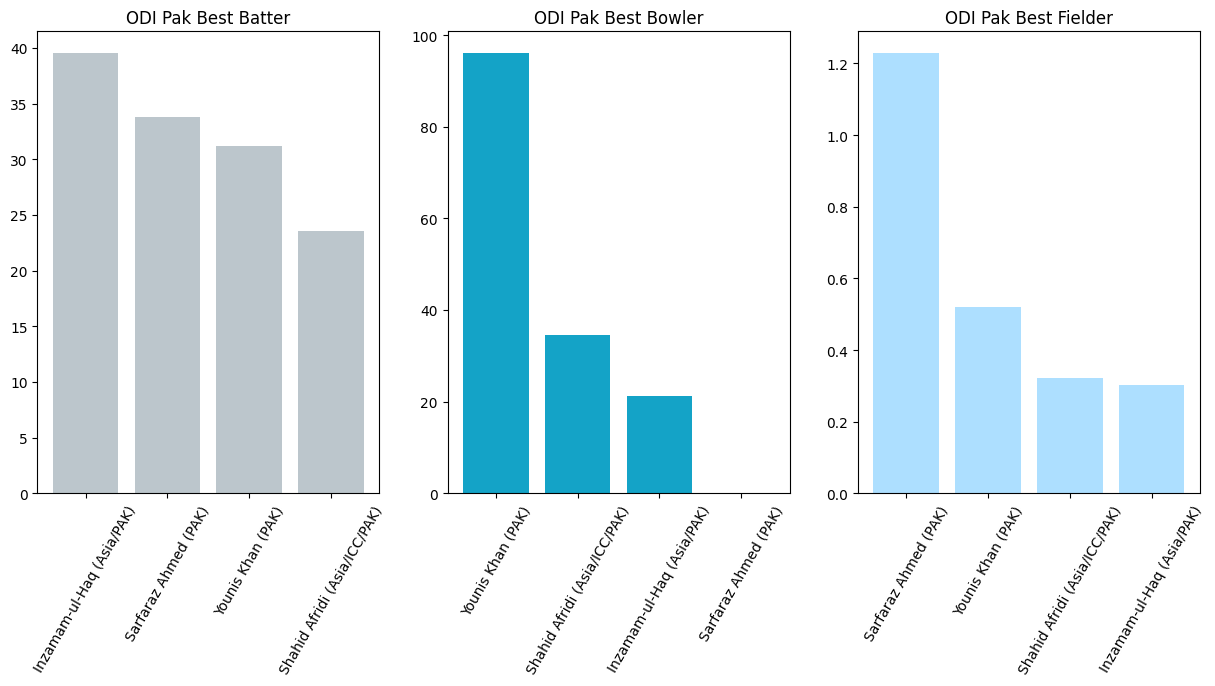

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(odi_pak_bat.index,odi_pak_bat['Ave_x'],color='#BCC6CC')
axs[0].set_title('ODI Pak Best Batter')
axs[0].set_xticks(odi_pak_bat.index)
axs[0].set_xticklabels(odi_pak_bat.index, rotation=60)

axs[1].bar(odi_pak_bow.index,odi_pak_bow['Ave_y'],color='#14A3C7')
axs[1].set_title('ODI Pak Best Bowler')
axs[1].set_xticks(odi_pak_bow.index)
axs[1].set_xticklabels(odi_pak_bow.index, rotation=60)

axs[2].bar(odi_pak_field.index,odi_pak_field['D/I'],color='#ADDFFF')
axs[2].set_title('ODI Pak Best Fielder')
axs[2].set_xticks(odi_pak_field.index)
axs[2].set_xticklabels(odi_pak_field.index, rotation=60)

[Text(0.0, 0, 'DPMD Jayawardene (Asia/SL)'),
 Text(1.0, 0, 'TM Dilshan (SL)'),
 Text(2.0, 0, 'M Muralitharan (Asia/ICC/SL)'),
 Text(3.0, 0, 'ST Jayasuriya (Asia/SL)')]

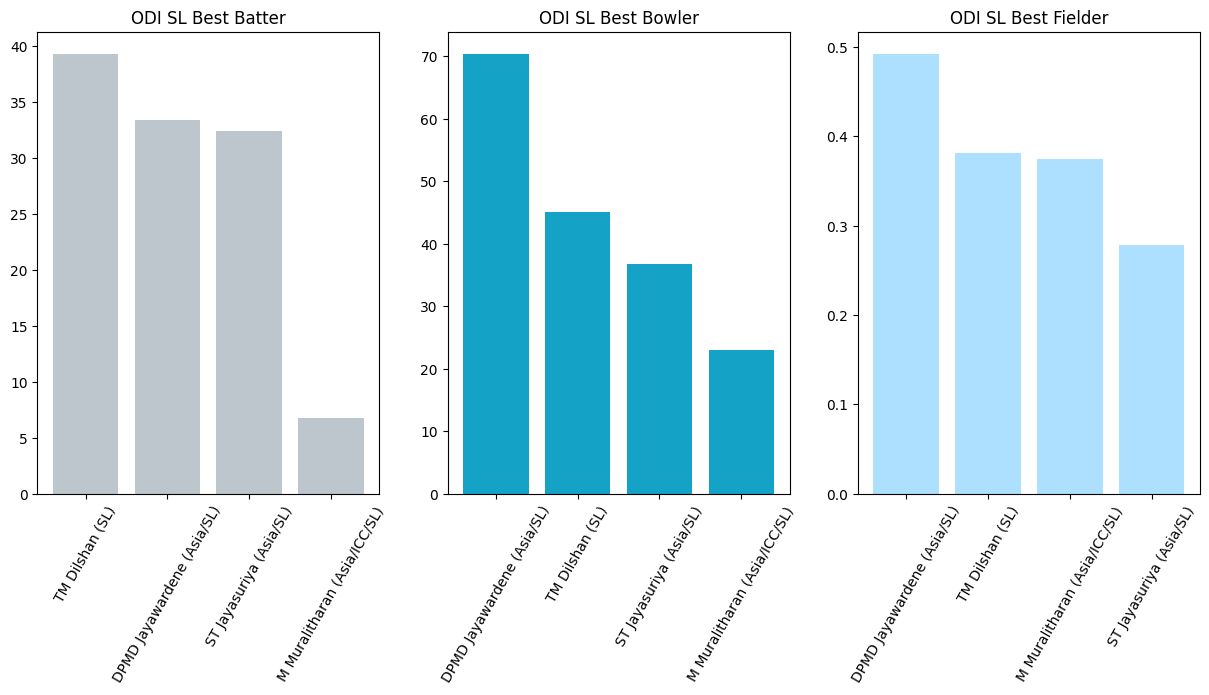

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
axs = axs.flatten()

axs[0].bar(odi_sl_bat.index,odi_sl_bat['Ave_x'],color='#BCC6CC')
axs[0].set_title('ODI SL Best Batter')
axs[0].set_xticks(odi_sl_bat.index)
axs[0].set_xticklabels(odi_sl_bat.index, rotation=60)

axs[1].bar(odi_sl_bow.index,odi_sl_bow['Ave_y'],color='#14A3C7')
axs[1].set_title('ODI SL Best Bowler')
axs[1].set_xticks(odi_sl_bow.index)
axs[1].set_xticklabels(odi_sl_bow.index, rotation=60)

axs[2].bar(odi_sl_field.index,odi_sl_field['D/I'],color='#ADDFFF')
axs[2].set_title('ODI SL Best Fielder')
axs[2].set_xticks(odi_sl_field.index)
axs[2].set_xticklabels(odi_sl_field.index, rotation=60)

## **Final**

### **T20 Model**

In [ ]:
data1

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,country
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,...,75,75,37,37,0,0,37,3 (3ct 0st),0.493,INDIA
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.10,1905,138.21,...,104,104,38,38,0,0,38,3 (3ct 0st),0.365,INDIA
2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,...,83,82,46,46,0,0,46,3 (3ct 0st),0.560,NZ
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,...,111,111,50,50,0,0,50,3 (3ct 0st),0.450,PAK
4,JP Duminy (SA),2007-2019,81,75,25,1934,96,38.68,1532,126.24,...,81,81,35,35,0,0,35,2 (2ct 0st),0.432,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,S Soosiyakumar (),2019-2019,1,1,0,0,0,0.00,2,0.00,...,1,1,0,0,0,0,0,0,0.000,
1229,H Ssenyondo (UGA),2019-2019,4,1,1,0,0,0.00,0,0.00,...,4,4,0,0,0,0,0,0,0.000,UGA
1230,Taijul Islam (BDESH),2019-2019,2,1,1,0,0,0.00,1,0.00,...,2,2,0,0,0,0,0,0,0.000,BDESH
1231,M Zondeki (SA),2006-2006,1,1,0,0,0,0.00,1,0.00,...,1,1,0,0,0,0,0,0,0.000,SA


In [ ]:
data1.shape

(1233, 37)

In [ ]:
data1['player'] = data1['Player'].str.split('(',expand=True)[0]
data1['country'] = data1['Player'].str.split('(',expand=True)[1]
data1['country'] = data1['country'].str.replace(')','')

In [ ]:
data1['country'].unique()

array(['INDIA', 'NZ', 'ICC/PAK', 'SA', 'IRE', 'PAK', 'SL', 'AUS', 'ZIM',
       'WI', 'BDESH', 'SCOT', 'SA/World', 'AFG', 'ENG', 'ICC/SL/World',
       'NL', 'NEPAL', 'KENYA', 'UAE', 'OMAN', 'WI/World', 'ENG/World',
       'HKG', 'HKG/NZ', 'PNG', 'NL/SA', 'CAN', 'QAT', 'MAL', 'SGP', 'NAM',
       'VAN', 'JER', 'USA', 'BMUDA', 'KUW', 'Moz', 'CZK-R', 'Aut', 'GUE',
       'ESP', 'Mald', 'GER', 'DEN', 'NZ/World', 'Mex', 'AFG/ICC', 'BAH',
       'ROM', 'UGA', 'MWI', 'PNM', 'Saudi', 'THAI', 'USA/WI', 'PORT',
       'GIBR', '', 'LUX', 'ITA', 'Botsw', 'CRC', 'NOR', 'NGA', 'Samoa',
       'Peru', 'Blz', 'Chile', 'MALTA', 'Fin', 'Caym', 'ENG/IRE', 'Belg',
       'PHI', 'BHU', 'Ghana', 'TKY', 'AUS/World', 'Arg', 'AFG/GER',
       'ICC/NZ', 'ICC/NEPAL', 'AUS/NL', '3 ', 'Serb', '2 ', '1 ',
       'ENG/ICC'], dtype=object)

In [ ]:
def val_col(country):
    countries = country.split('/')
    valid_countries = [country for country in countries if country not in ['ICC', 'Asia', 'Afr', 'EAf','World','2 ','3 ','1 ','Serb']]
    return valid_countries[-1] if valid_countries else np.nan

In [ ]:
data1['country'] = data1['country'].apply(val_col)
data1['country'].unique()

array(['INDIA', 'NZ', 'PAK', 'SA', 'IRE', 'SL', 'AUS', 'ZIM', 'WI',
       'BDESH', 'SCOT', 'AFG', 'ENG', 'NL', 'NEPAL', 'KENYA', 'UAE',
       'OMAN', 'HKG', 'PNG', 'CAN', 'QAT', 'MAL', 'SGP', 'NAM', 'VAN',
       'JER', 'USA', 'BMUDA', 'KUW', 'Moz', 'CZK-R', 'Aut', 'GUE', 'ESP',
       'Mald', 'GER', 'DEN', 'Mex', 'BAH', 'ROM', 'UGA', 'MWI', 'PNM',
       'Saudi', 'THAI', 'PORT', 'GIBR', '', 'LUX', 'ITA', 'Botsw', 'CRC',
       'NOR', 'NGA', 'Samoa', 'Peru', 'Blz', 'Chile', 'MALTA', 'Fin',
       'Caym', 'Belg', 'PHI', 'BHU', 'Ghana', 'TKY', 'Arg', nan],
      dtype=object)

In [ ]:
data1 = data1.dropna()
data1.shape

(1222, 38)

In [ ]:
data1.columns

Index(['Player', 'Span', 'Mat_x', 'Inns_x', 'NO', 'Runs_x', 'HS', 'Ave_x',
       'BF', 'SR_x', '100', '50', '0', '4s', '6s', 'Mat_y', 'Inns_y', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'BBI', 'Ave_y', 'Econ', 'SR_y', '4', '5',
       'Mat', 'Inns', 'Dis', 'Ct', 'St', 'Ct Wk', 'Ct Fi', 'MD', 'D/I',
       'country', 'player'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['country'] = le.fit_transform(data1['country'])

<ipython-input-146-6b829735e8f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['country'] = le.fit_transform(data1['country'])


In [ ]:
data1['country'].unique()

array([26, 44, 46, 54, 27, 57,  2, 67, 66,  6, 55,  1, 18, 42, 40, 30, 62,
       45, 25, 48, 12, 52, 33, 56, 39, 65, 29, 64,  8, 31, 38, 14,  4, 23,
       19, 36, 21, 17, 37,  5, 53, 63, 35, 49, 59, 60, 50, 22,  0, 32, 28,
       11, 13, 43, 41, 58, 51, 10, 16, 34, 20, 15,  9, 47,  7, 24, 61,  3])

In [ ]:
data1.columns

Index(['Player', 'Span', 'Mat_x', 'Inns_x', 'NO', 'Runs_x', 'HS', 'Ave_x',
       'BF', 'SR_x', '100', '50', '0', '4s', '6s', 'Mat_y', 'Inns_y', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'BBI', 'Ave_y', 'Econ', 'SR_y', '4', '5',
       'Mat', 'Inns', 'Dis', 'Ct', 'St', 'Ct Wk', 'Ct Fi', 'MD', 'D/I',
       'country', 'player'],
      dtype='object')

In [ ]:
data1[['start_year','end_year']] = data1['Span'].str.split('-',expand=True)
data1

<ipython-input-149-10538c9ca256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[['start_year','end_year']] = data1['Span'].str.split('-',expand=True)
<ipython-input-149-10538c9ca256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[['start_year','end_year']] = data1['Span'].str.split('-',expand=True)


,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,...,37,0,0,37,3 (3ct 0st),0.493,26,V Kohli,2010,2019
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.10,1905,138.21,...,38,0,0,38,3 (3ct 0st),0.365,26,RG Sharma,2007,2019
2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,...,46,0,0,46,3 (3ct 0st),0.560,44,MJ Guptill,2009,2019
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,...,50,0,0,50,3 (3ct 0st),0.450,46,Shoaib Malik,2006,2019
4,JP Duminy (SA),2007-2019,81,75,25,1934,96,38.68,1532,126.24,...,35,0,0,35,2 (2ct 0st),0.432,54,JP Duminy,2007,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,S Soosiyakumar (),2019-2019,1,1,0,0,0,0.00,2,0.00,...,0,0,0,0,0,0.000,0,S Soosiyakumar,2019,2019
1229,H Ssenyondo (UGA),2019-2019,4,1,1,0,0,0.00,0,0.00,...,0,0,0,0,0,0.000,63,H Ssenyondo,2019,2019
1230,Taijul Islam (BDESH),2019-2019,2,1,1,0,0,0.00,1,0.00,...,0,0,0,0,0,0.000,6,Taijul Islam,2019,2019
1231,M Zondeki (SA),2006-2006,1,1,0,0,0,0.00,1,0.00,...,0,0,0,0,0,0.000,54,M Zondeki,2006,2006


In [ ]:
data1.columns

Index(['Player', 'Span', 'Mat_x', 'Inns_x', 'NO', 'Runs_x', 'HS', 'Ave_x',
       'BF', 'SR_x', '100', '50', '0', '4s', '6s', 'Mat_y', 'Inns_y', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'BBI', 'Ave_y', 'Econ', 'SR_y', '4', '5',
       'Mat', 'Inns', 'Dis', 'Ct', 'St', 'Ct Wk', 'Ct Fi', 'MD', 'D/I',
       'country', 'player', 'start_year', 'end_year'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['player'] = le.fit_transform(data1['player'])

reverse_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(reverse_mapping)

{0: 'A Ahmadhel ', 1: 'A Ashokan ', 2: 'A Aspiotis ', 3: 'A Bhattarai ', 4: 'A Bohara ', 5: 'A Carthew ', 6: 'A Dananjaya ', 7: 'A Flintoff ', 8: 'A Husain ', 9: 'A Karn ', 10: 'A Khan ', 11: 'A Krishna ', 12: 'A Lagos ', 13: 'A Lark ', 14: 'A Makesh ', 15: 'A Mansale ', 16: 'A Mehmood ', 17: 'A Mishra ', 18: 'A Morris ', 19: 'A Nanda ', 20: 'A Nao ', 21: 'A Nathwani ', 22: 'A Natubhai Ahir ', 23: 'A Ndlovu ', 24: 'A Nehra ', 25: 'A Nel ', 26: 'A Orfila ', 27: 'A Patel ', 28: 'A Pusthay ', 29: 'A Rangaswamy ', 30: 'A Sathya ', 31: 'A Shahzad ', 32: 'A Srivastav ', 33: 'A Symonds ', 34: 'A Uniyal ', 35: 'A Vala ', 36: 'A Zampa ', 37: 'AA Banner ', 38: 'AA Noffke ', 39: 'AA Westphal ', 40: 'AB Agarkar ', 41: 'AB Dinda ', 42: 'AB Dursak ', 43: 'AC Agar ', 44: 'AC Botha ', 45: 'AC Douglas ', 46: 'AC Evans ', 47: 'AC Kose ', 48: 'AC Voges ', 49: 'ACF Stokes ', 50: 'AD Mascarenhas ', 51: 'AD Mathews ', 52: 'AD Russell ', 53: 'AF Ifill ', 54: 'AF Milne ', 55: 'AG Achar ', 56: 'AG Cremer ', 57

<ipython-input-151-bf5748aac58a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['player'] = le.fit_transform(data1['player'])


In [ ]:
x = data1[['player','start_year','end_year','country','Mat_x','Inns_x',]]
y = data1['Runs_x']

### Linear reg model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data1['player'].unique()

array([1159,  904,  672, ..., 1138,  650, 1221])

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
print("Linear regression accuracy is :",r2_score(y_test,y_pred))

Linear regression accuracy is : 0.8886210171204874


In [ ]:
#rohit data

In [ ]:
data1[data1['player']==904]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,...,38,0,0,38,3 (3ct 0st),0.365,26,904,2007,2019


In [ ]:
filtered_x_test = x_test[x_test['player'] == 904]

indices = filtered_x_test.index

filtered_y_test = y_test.loc[indices]

In [ ]:
print(filtered_x_test)
print(indices)
print(filtered_y_test)

   player start_year end_year  country  Mat_x  Inns_x
1     904       2007     2019       26    104      96
Index([1], dtype='int64')
1    2633
Name: Runs_x, dtype: int64


In [ ]:
lr.predict([[904,2007,2019,26,104,96]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2050.84188548])

In [ ]:
#koli data

In [ ]:
data1.head(1)

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,...,37,0,0,37,3 (3ct 0st),0.493,26,1159,2010,2019


In [ ]:
data1[data1['player']==1159]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,...,37,0,0,37,3 (3ct 0st),0.493,26,1159,2010,2019


In [ ]:
lr.predict([[1159,2010,2019,26,75,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1491.75205958])

In [ ]:
data1[['player','Player','Runs_x']]

,player,Player,Runs_x
0,1159,V Kohli (INDIA),2633
1,904,RG Sharma (INDIA),2633
2,672,MJ Guptill (NZ),2436
3,1069,Shoaib Malik (ICC/PAK),2263
4,524,JP Duminy (SA),1934
...,...,...,...
1228,978,S Soosiyakumar (),0
1229,394,H Ssenyondo (UGA),0
1230,1138,Taijul Islam (BDESH),0
1231,650,M Zondeki (SA),0


In [ ]:
#malik

In [ ]:
data1[data1['player']==1069]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,...,50,0,0,50,3 (3ct 0st),0.45,46,1069,2006,2019


In [ ]:
lr.predict([[1069,2006,2019,46,111,104]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2235.05682042])

### Compare the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = [LinearRegression(),SVR(),RandomForestRegressor(n_estimators=100),KNeighborsRegressor(n_neighbors=5),DecisionTreeRegressor(random_state=42)]

In [ ]:
def com_model():
  for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"model is {model} and r2 score is {r2_score(y_test,y_pred)}")

In [ ]:
com_model()

model is LinearRegression() and r2 score is 0.8886210171204874
model is SVR() and r2 score is -0.10297817777222895
model is RandomForestRegressor() and r2 score is 0.8724618646623429
model is KNeighborsRegressor() and r2 score is 0.4571065170523495
model is DecisionTreeRegressor(random_state=42) and r2 score is 0.7921291212188635


### Grid search

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_samples': [None, 0.5, 0.7],
}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_samples': [None, 0.5, 0.7],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'criterion': 'squared_error', 'max_depth': 40, 'max_samples': 0.5, 'n_estimators': 50}


In [ ]:
print(f'Best Score: {grid_search.best_score_}')

Best Score: 0.9081273009020678


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=40, max_samples=0.5, n_estimators=50)

In [ ]:
y_pred = best_model.predict(x_test)
print(f'Grid Search CV random forest : {r2_score(y_test, y_pred)}')

Grid Search CV random forest : 0.8813310085966967


In [ ]:
#rohit

In [ ]:
best_model.predict([[904,2007,2019,26,104,96]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1759.3])

In [ ]:
data1[data1['player']==904]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,...,38,0,0,38,3 (3ct 0st),0.365,26,904,2007,2019


In [ ]:
best_model.predict([[904,2007,2019,26,104,96]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1759.3])

In [ ]:
#virat

In [ ]:
data1[data1['player']==1159]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
0,V Kohli (INDIA),2010-2019,75,70,20,2633,94,52.66,1907,138.07,...,37,0,0,37,3 (3ct 0st),0.493,26,1159,2010,2019


In [ ]:
best_model.predict([[1159,2010,2019,26,75,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2043.58])

In [ ]:
#russell

In [ ]:
data1[data1['player'] == 52]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
82,AD Russell (WI),2011-2018,47,39,13,465,47,17.88,329,141.33,...,11,0,0,11,2 (2ct 0st),0.234,66,52,2011,2018


In [ ]:
best_model.predict([[52,2011,2018,66,47,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([671.72])

In [ ]:
#malik

In [ ]:
data1[data1['player']==1069]

,Player,Span,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Ct,St,Ct Wk,Ct Fi,MD,D/I,country,player,start_year,end_year
3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,...,50,0,0,50,3 (3ct 0st),0.45,46,1069,2006,2019


In [ ]:
best_model.predict([[1069,2006,2019,46,111,104]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1881.06])